# Requirements

In [32]:
import pandas as pd
import os
import math
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.patches as mpatches
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import numpy as np
from functools import reduce
import pickle
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt



In [27]:
node_group = pd.read_csv(r"node-groups/2024-12-14T000000Z_2025-04-13T235959Z/groups.csv")
df_vms = pd.read_csv(r"vms/2024-12-14T000000Z_2025-04-13T235959Z/vms.csv")


In [28]:

# Fixing data
wrong_data = df_vms[df_vms['vcpus'] > 128].copy()
wrong_data[['vcpus', 'memory_mb']] = wrong_data[['memory_mb', 'vcpus']]
wrong_data['ephemeral_gb'] = 0.0


df_vms.loc[wrong_data.index, ['vcpus', 'memory_mb', 'ephemeral_gb']] = wrong_data[['vcpus', 'memory_mb', 'ephemeral_gb']]

print(df_vms.loc[wrong_data.index, ['vcpus', 'memory_mb', 'ephemeral_gb']])


     vcpus  memory_mb  ephemeral_gb
6     30.0     3500.0           0.0
7     30.0     3500.0           0.0
8     30.0    15000.0           0.0
9     30.0     3500.0           0.0
10    30.0     3500.0           0.0
11    30.0    60000.0           0.0
12    30.0    15000.0           0.0
13    30.0    60000.0           0.0
21    30.0     7000.0           0.0
34    20.0     3500.0           0.0
36    10.0     2000.0           0.0
104   10.0     2000.0           0.0
105   10.0     4000.0           0.0
106   10.0     4000.0           0.0
107   10.0     4000.0           0.0
119   30.0     7500.0           0.0
142   30.0    14000.0           0.0
146   30.0    30000.0           0.0
166   10.0     5000.0           0.0
169   20.0    11000.0           0.0
171   10.0     5000.0           0.0
215   10.0     5000.0           0.0
216   10.0     5000.0           0.0
217   10.0     5000.0           0.0
318   10.0     5000.0           0.0
338   30.0   192000.0           0.0


# Loading and creating datasets

In [7]:
node = 'f6fec747'

node_group_path = f"nodes/2024-12-14T000000Z_2025-04-13T235959Z/{node}"  

print(node_group_path)
files = [f for f in os.listdir(node_group_path) if f.endswith('.csv')]
print(files)
dfs = []

for file in files:
    full_path = os.path.join(node_group_path, file)
    df = pd.read_csv(full_path)

    node_name = file.replace('.csv', '')
    df['node_name'] = node_name
    dfs.append(df)

combined_df = pd.concat(dfs, ignore_index=True)
combined_df.to_csv(f'combined/combined_node_group_{node}.csv', index=False)

base_path = f"nodes-vms/2024-12-14T000000Z_2025-04-13T235959Z/{node}"  # Pas pad aan!
node_group = os.path.basename(base_path)

all_dfs = []

for host in os.listdir(base_path):
    host_path = os.path.join(base_path, host)
    if os.path.isdir(host_path):
        csv_files = [f for f in os.listdir(host_path) if f.endswith('.csv')]
        for csv_file in csv_files:
            full_path = os.path.join(host_path, csv_file)
            df = pd.read_csv(full_path)
            all_dfs.append(df)


combined_df = pd.concat(all_dfs, ignore_index=True)
combined_df.to_csv(f'combined/combined_nodes-vms_group_{node}.csv', index=False)


node_group = pd.read_csv(f'combined/combined_node_group_{node}.csv')
nodes_vms= pd.read_csv(f'combined/combined_nodes-vms_group_{node}.csv')



# Merging

df = pd.merge(
    node_group,
    nodes_vms,
    how='left',
    left_on=["timestamp", "node_name", "node_group"],
    right_on=["timestamp","hypervisor_name", "hypervisor_group"],
)

# Change!
df.to_csv(f'combined/d_747.csv', index=False)

nodes/2024-12-14T000000Z_2025-04-13T235959Z/f6fec747
['7f384201.csv', 'c2736b43.csv', '4791e4fe.csv', '6ff55332.csv', '3176c89e.csv', 'b022aa11.csv', '7e99a5c6.csv', 'a2ff297e.csv']


In [60]:
df_24e = pd.read_csv(r'combined/d_24e.csv')
df_569 = pd.read_csv(r'combined/d_569.csv')
df_608 = pd.read_csv(r'combined/d_608.csv')
df_747 = pd.read_csv(r'combined/d_747.csv')
df_b23 = pd.read_csv(r'combined/d_b23.csv')
df_f15 = pd.read_csv(r'combined/d_f15.csv')

dfs = [
    ("24e", df_24e),
    ("569", df_569),
    ("608", df_608),
    ("747", df_747),
    ("b23", df_b23),
    ("f15", df_f15),
]

for node, df in dfs:
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df['hour'] = df['timestamp'].dt.hour  

/var/folders/bw/dt752p_n29dft6vhhqmjtm_m0000gn/T/ipykernel_88177/3607510709.py:1: DtypeWarning: Columns (49,50,51) have mixed types. Specify dtype option on import or set low_memory=False.
  df_24e = pd.read_csv(r'combined/d_24e.csv')
/var/folders/bw/dt752p_n29dft6vhhqmjtm_m0000gn/T/ipykernel_88177/3607510709.py:2: DtypeWarning: Columns (44,45,46) have mixed types. Specify dtype option on import or set low_memory=False.
  df_569 = pd.read_csv(r'combined/d_569.csv')
/var/folders/bw/dt752p_n29dft6vhhqmjtm_m0000gn/T/ipykernel_88177/3607510709.py:3: DtypeWarning: Columns (1,49,50,51) have mixed types. Specify dtype option on import or set low_memory=False.
  df_608 = pd.read_csv(r'combined/d_608.csv')
/var/folders/bw/dt752p_n29dft6vhhqmjtm_m0000gn/T/ipykernel_88177/3607510709.py:4: DtypeWarning: Columns (42,43,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df_747 = pd.read_csv(r'combined/d_747.csv')
/var/folders/bw/dt752p_n29dft6vhhqmjtm_m0000gn/T/ipykernel

# Basic overview

In [8]:

for name, df in dfs:
    unique_nodes = set(df['node_name'])
    print(f"Amount machines in {name}: {len(unique_nodes)}")




Amount machines in 24e: 5
Amount machines in 569: 20
Amount machines in 608: 71
Amount machines in 747: 8
Amount machines in b23: 21
Amount machines in f15: 12


In [9]:
for name, df in dfs:
    energy = sum(df['ipmi_system_power_watts'].fillna(0)) * 0.05 / 1000
    print(f"Energy kwh {name}: {(energy)}")

Energy kwh 24e: 1576.2112905000001
Energy kwh 569: 8291.4366185
Energy kwh 608: 279887.961091
Energy kwh 747: 4897.029818
Energy kwh b23: 16645.081026
Energy kwh f15: 4189.8503315


In [10]:
for name, df in dfs:
    # Because of fillna all nan are seen as 0 yet this is not a category, therefore -1

    vms = len(set(df['vm_id'].fillna(0))) - 1
    print(f"Amount of vms {name}: {(vms)}")


Amount of vms 24e: 3
Amount of vms 569: 46
Amount of vms 608: 462
Amount of vms 747: 20
Amount of vms b23: 22
Amount of vms f15: 50


In [11]:
hourly_means_df = pd.DataFrame({'hour': range(24)}).set_index('hour')


for node, df in dfs:
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df['hour'] = df['timestamp'].dt.hour  
    hourly = df.groupby('hour')['ipmi_system_power_watts'].mean()
    hourly_means_df[node] = hourly

hourly_means_df

24e         569         608         747         b23         f15
hour                                                                        
0     130.118521  173.739763  427.156796  110.118635  288.959113  147.871045
1     129.575526  173.670924  426.803636  101.781926  288.377631  148.341428
2     128.330608  173.328784  426.722910  101.463921  287.795870  148.026530
3     127.282445  172.989694  426.536523  109.646966  287.529554  148.570719
4     126.842805  173.394737  426.441343  101.703295  287.080359  148.990757
5     126.089046  172.957576  426.274893  101.511197  286.632353  148.044385
6     125.979106  172.708073  426.348830  110.493090  286.390234  148.207361
7     126.709603  172.471017  426.276155  103.390430  286.022695  148.614817
8     127.374071  171.799179  426.471739  104.547843  287.484224  148.676958
9     128.525561  172.229302  426.638398  113.059062  287.841235  150.909501
10    129.272658  172.385528  427.016579  105.686769  288.654985  150.719663
11    129.440325  175.060023  427.201626  105.141085  289.328336  152.498721
12    129.552824  174.297788  427.385941  112.593374  290.422369  150.049161
13    129.140640  174.103217  427.567446  105.181055  290.872709  149.070117
14    128.868987  172.454296  427.637552  105.045396  290.754716  148.326151
15    128.467024  172.090462  427.615118  112.118953  291.714251  148.614660
16    129.259281  172.408845  426.872678  104.011848  292.371518  149.685031
17    129.217820  171.847145  426.857302  103.597476  292.243661  149.762062
18    129.314613  172.733595  426.877893  110.798782  291.804072  150.342351
19    130.614713  173.112753  426.984161  102.591329  291.092045  150.486680
20    131.581223  172.757437  427.569190  102.511538  290.535284  149.801235
21    130.377920  172.771095  427.636884  110.689461  289.820818  150.501429
22    129.437115  173.024498  427.383951  102.196626  289.425089  149.734335
23    129.333716  173.522592  427.188148  101.642825  289.041753  150.430318

In [ ]:

group_node_hourly = {}


for name, df in dfs:
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df['hour'] = df['timestamp'].dt.hour

    pivot = df.groupby(['hour', 'node_name'])['ipmi_system_power_watts'].mean().unstack()
    group_node_hourly[name] = pivot


    os.makedirs("combined/hourly_node_means", exist_ok=True)
    pivot.to_csv(f"combined/hourly_node_means/hourly_node_means_{name}.csv")

    plt.figure(figsize=(12, 6))
    for node in pivot.columns:
        plt.plot(pivot.index, pivot[node], label=node)
    plt.title(f"Average energy usage per hour - Machine type: {name}")
    plt.xlabel("Hour of the day")
    plt.ylabel("Average energy used (Watt)")
    plt.legend(title="Node", fontsize='small', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.savefig(f"combined/hourly_node_means/plot_hourly_nodes_{name}.png", dpi=300)
    plt.close()



/var/folders/bw/dt752p_n29dft6vhhqmjtm_m0000gn/T/ipykernel_84960/530348856.py:24: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


# Analysing

## df_24e

In [ ]:
df_24e.groupby(['hour', 'node_name'])['ipmi_system_power_watts'].mean().unstack()


df_24e['date'] = df_24e['timestamp'].dt.date
print(len(df_24e['date']))
# Missing data

missing_days = df_24e.groupby('date')['ipmi_system_power_watts'].apply(lambda x: x.isna().any().any())
print(sum(missing_days))
df_24e['incomplete_data'] = df_24e['date'].isin(missing_days[missing_days].index)

df_clean_24e = df_24e[~df_24e['incomplete_data']].copy()
print(len(df_clean_24e['date']))

290400
77
105600


### Basics

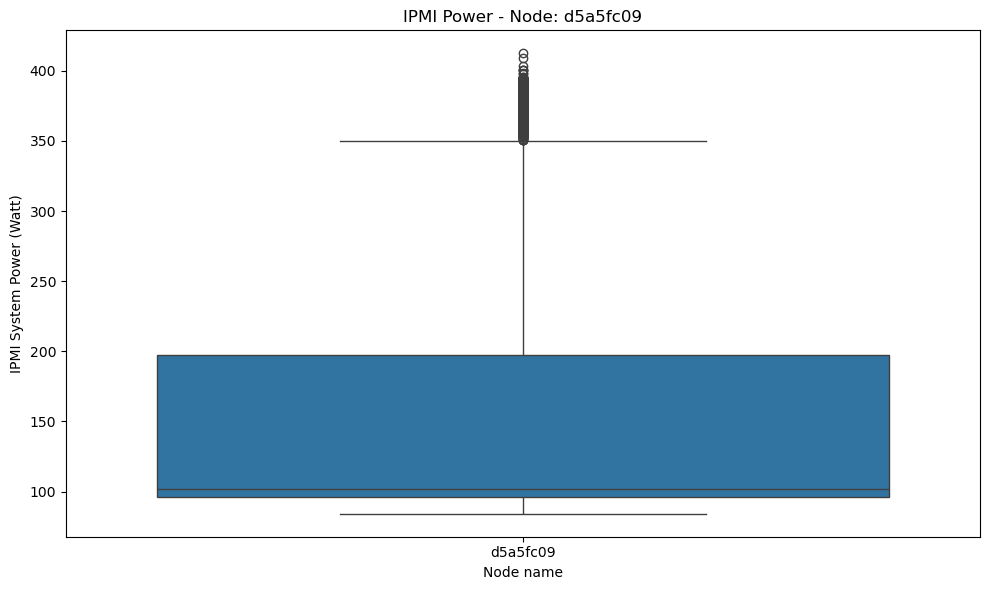

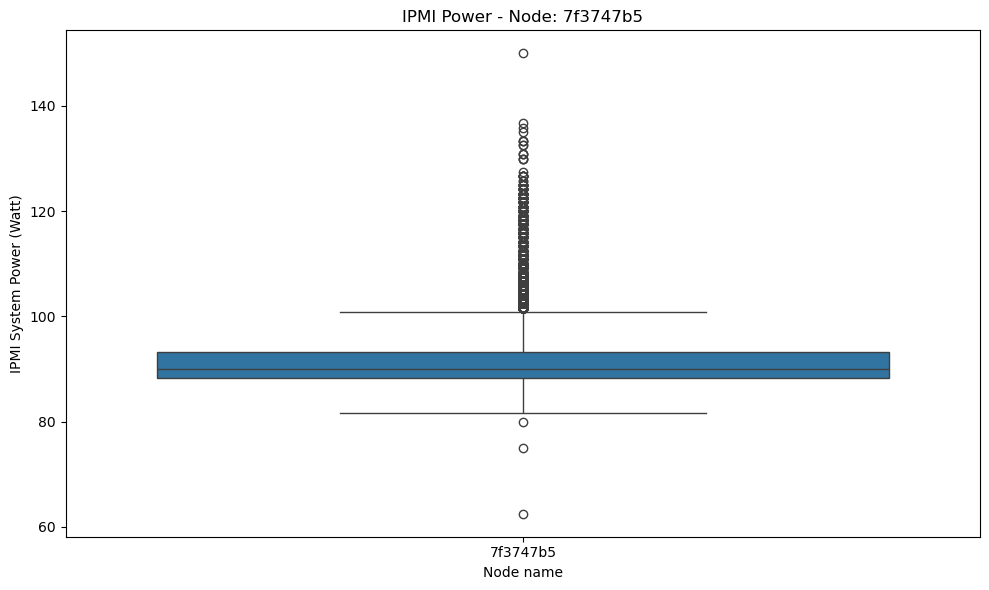

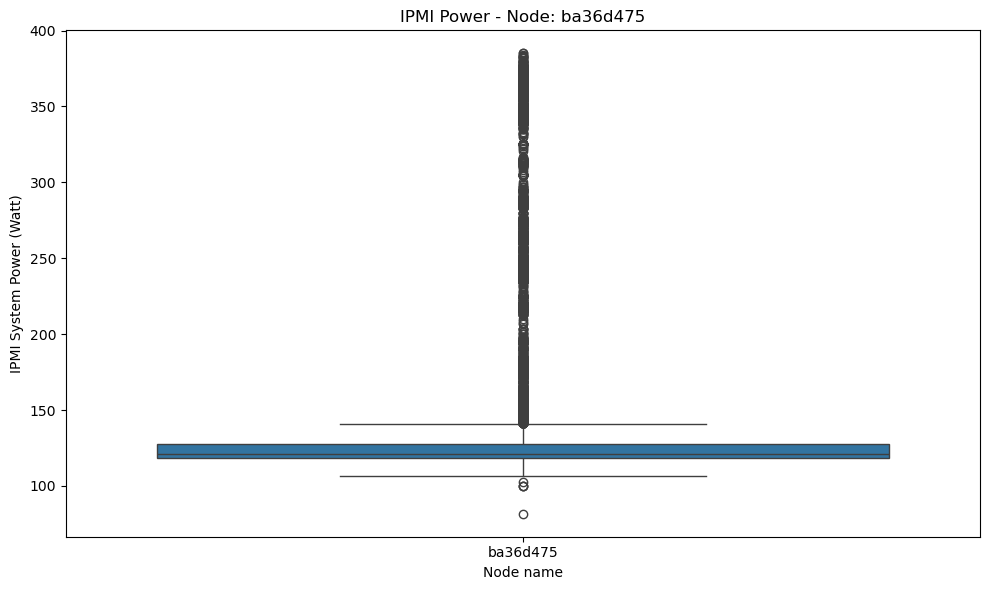

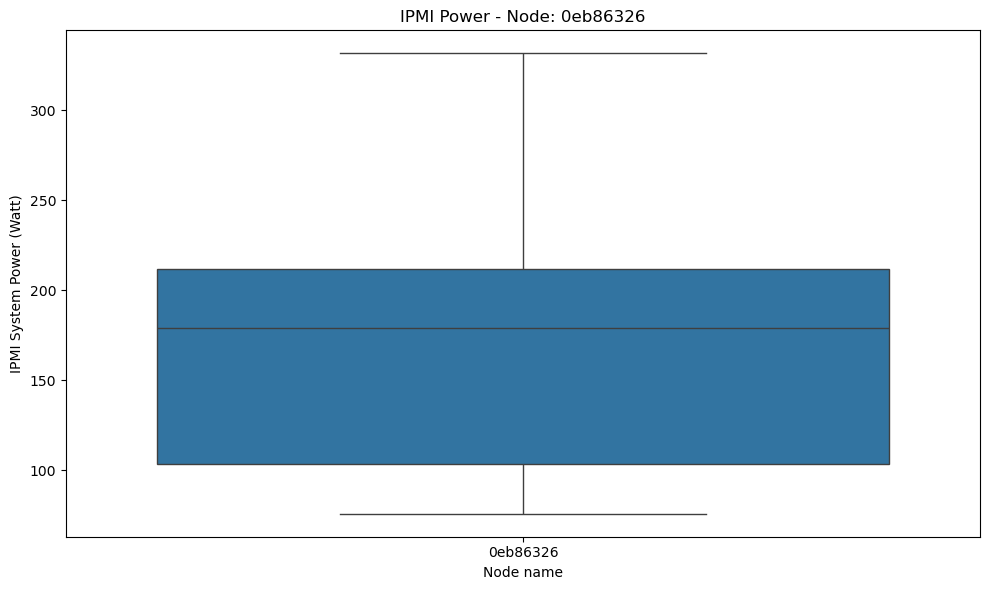

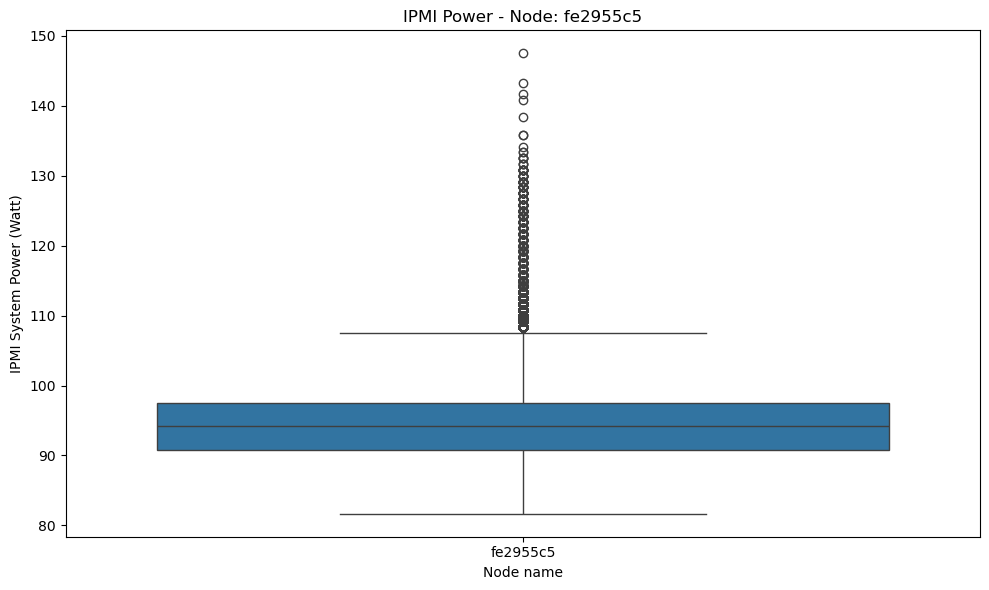

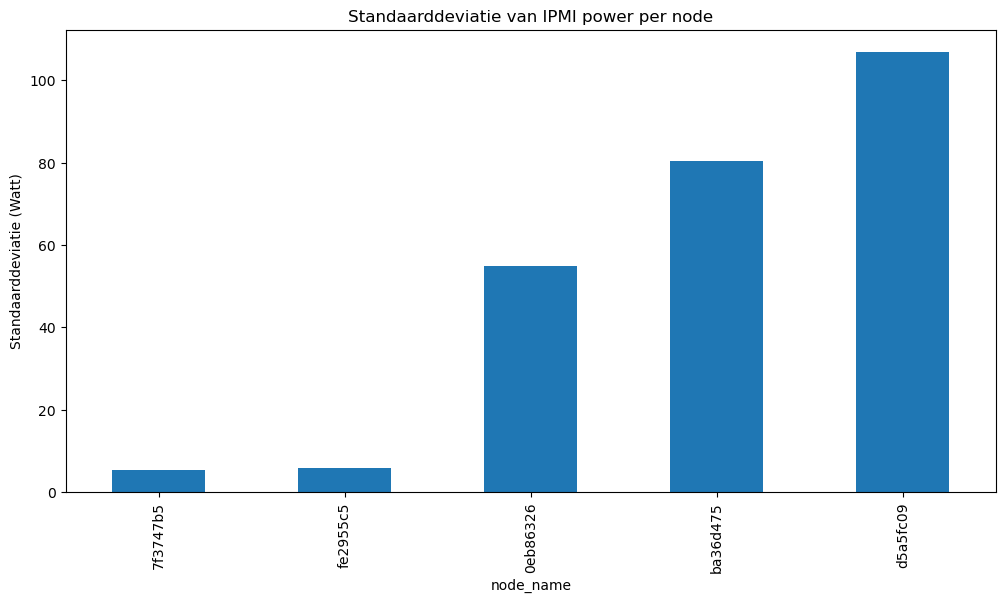

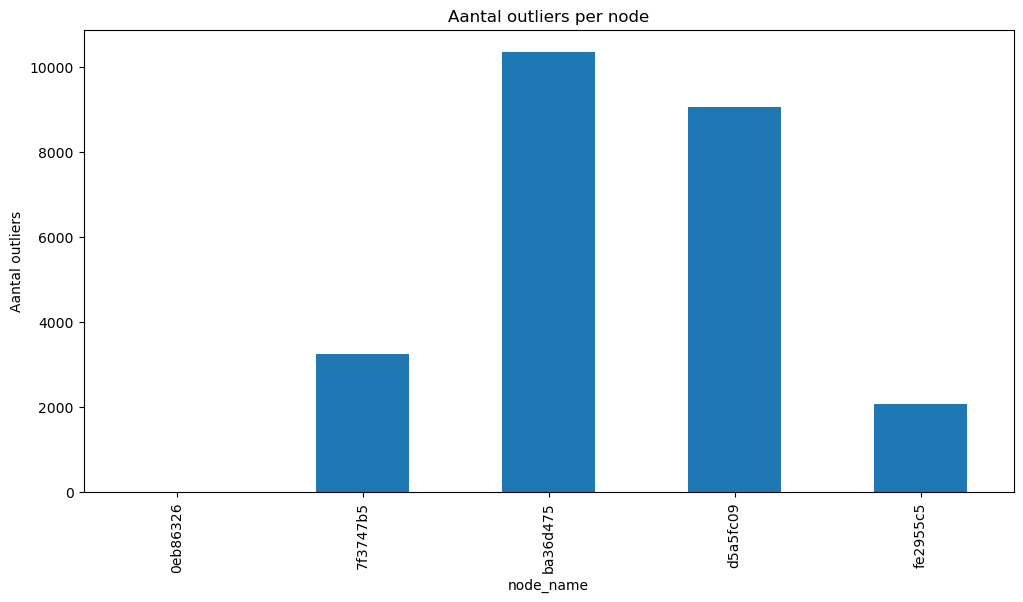

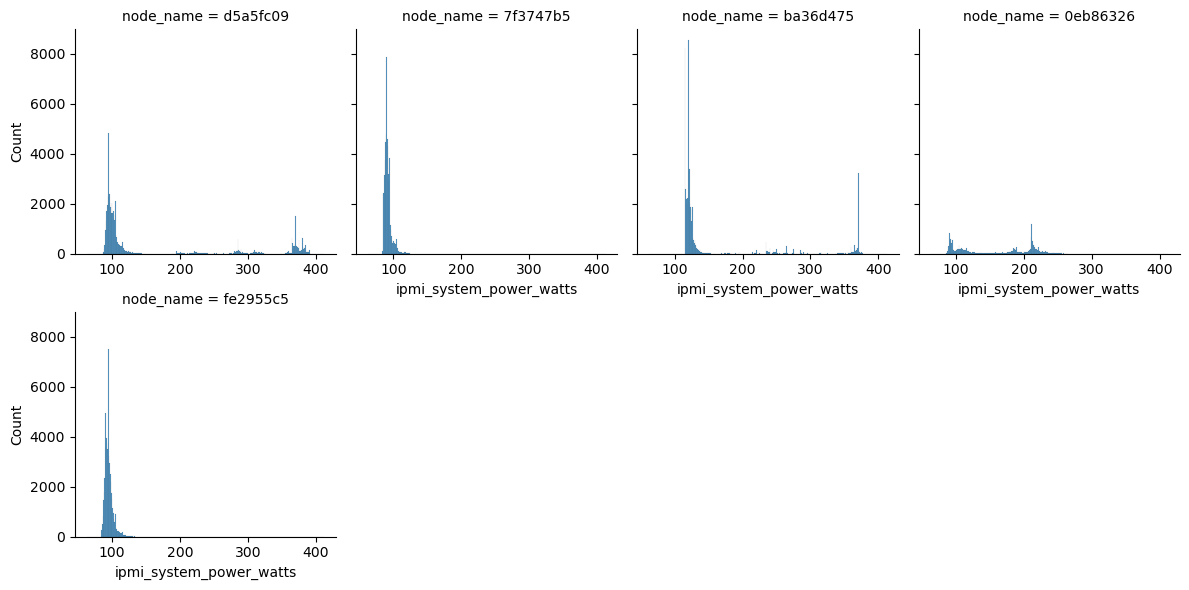

In [15]:
# Basic information about the node

nodes = df_24e['node_name'].unique()

for node in nodes:
    subset = df_24e[df_24e['node_name'] == node]
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='node_name', y='ipmi_system_power_watts', data=subset)
    plt.title(f'IPMI Power - Node: {node}')
    plt.xlabel('Node name')
    plt.ylabel('IPMI System Power (Watt)')
    plt.tight_layout()
    plt.show()

stds_24e = df_24e.groupby('node_name')['ipmi_system_power_watts'].std().sort_values()

stds_24e.plot(kind='bar', figsize=(12, 6), title='Standaarddeviatie van IPMI power per node')
plt.ylabel('Standaarddeviatie (Watt)')
plt.show()
def count_outliers(group):
    q1 = group.quantile(0.25)
    q3 = group.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return ((group < lower) | (group > upper)).sum()

outlier_counts = df_24e.groupby('node_name')['ipmi_system_power_watts'].apply(count_outliers)
outlier_counts.plot(kind='bar', figsize=(12, 6), title='Aantal outliers per node')
plt.ylabel('Aantal outliers')
plt.show()


sns.displot(df_24e, x='ipmi_system_power_watts', col='node_name', col_wrap=4, height=3, facet_kws={'sharex': False})
plt.show()

In [ ]:
# Calculating correlations between ipmi_system_power_watts and the rest of the dataset
num_df = df_24e.select_dtypes(include='number')

corr = num_df.corr()
strong_corr = corr['ipmi_system_power_watts'].abs()
strong_corr = strong_corr[strong_corr > 0.6]

print('Highly correlated features with ipmi_system_power_watts (> 0.6):')
print(strong_corr)

# Selected_features based upon strong_corr

selected_features = [
    'cpu_usage_percent',              
    'cpu_softirq_percent',          
    'load_shortterm_percent',       
    'ipmi_cpu_power_watts',          
    'ipmi_memory_power_watts',  
    'ipmi_system_power_watts',   
    'ipmi_psu1_ac_in_power_watts', 
    'rapl_power_total_watts',    
    'rapl_power_dram_0_watts',       
    'scaphandre_power_total_watts',   
    'scaphandre_vm_power_total_watts' 
]


Highly correlated features with ipmi_system_power_watts (> 0.6):
cpu_usage_percent                  0.923177
cpu_idle_percent                   0.923177
cpu_softirq_percent                0.636013
cpu_user_percent                   0.918378
load_shortterm_percent             0.922811
load_midterm_percent               0.922636
load_longterm_percent              0.921986
ipmi_system_power_watts            1.000000
ipmi_cpu_power_watts               0.995999
ipmi_memory_power_watts            0.906938
ipmi_fan_power_watts               0.783475
ipmi_psu1_ac_in_power_watts        0.995127
ipmi_psu2_ac_in_power_watts        0.994314
ipmi_psu1_dc_out_power_watts       0.993231
ipmi_psu2_dc_out_power_watts       0.994349
rapl_power_total_watts             0.996917
rapl_power_package_0_watts         0.993489
rapl_power_package_1_watts         0.996217
rapl_power_dram_0_watts            0.910437
rapl_power_dram_1_watts            0.905206
scaphandre_power_total_watts       0.997280
scaphandre_

### PCA

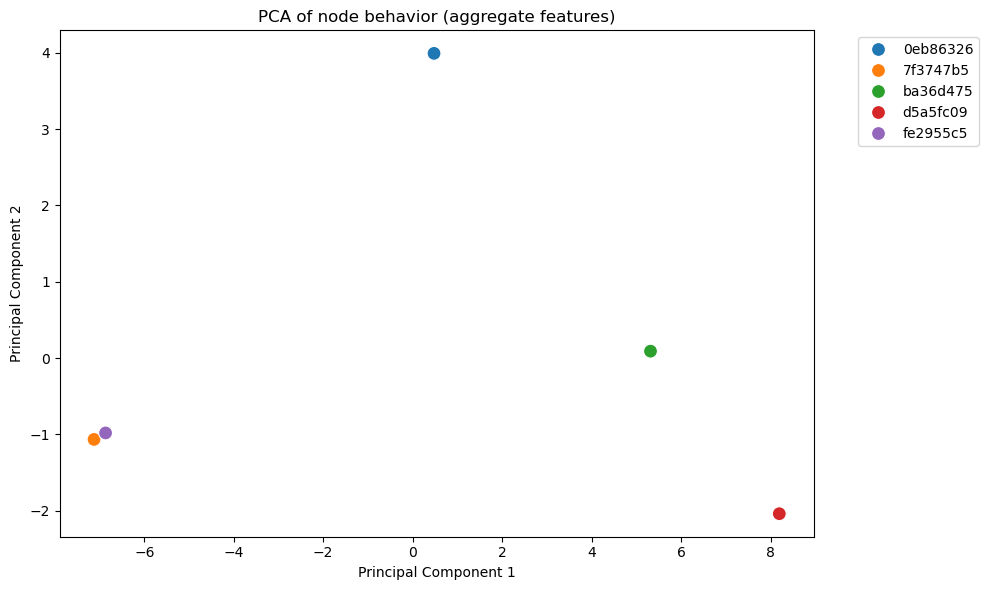

                                        PC1       PC2
ipmi_memory_power_watts_mean       0.118437  0.310932
cpu_softirq_percent_mean           0.131076  0.243985
ipmi_psu1_ac_in_power_watts_mean   0.139973  0.227112
ipmi_memory_power_watts_std        0.141138  0.226093
ipmi_psu1_dc_out_power_watts_mean  0.139624  0.223175
rapl_power_dram_0_watts_mean       0.138365  0.214581
ipmi_cpu_power_watts_mean          0.145676  0.194150
ipmi_system_power_watts_mean       0.146829  0.192019
ipmi_psu2_dc_out_power_watts_mean  0.149034  0.163229
rapl_power_dram_0_watts_std        0.150866  0.161891
                                        PC1       PC2
ipmi_psu2_dc_out_power_watts_std   0.160480 -0.026043
ipmi_system_power_watts_std        0.160398 -0.003212
scaphandre_power_total_watts_mean  0.160375  0.027784
scaphandre_power_total_watts_std   0.160361 -0.028827
rapl_power_total_watts_std         0.160360 -0.030743
ipmi_cpu_power_watts_std           0.160301 -0.012840
rapl_power_package_1_watts_m

In [13]:
# PCA

features = strong_corr.index.tolist()

agg_df = df_24e.groupby('node_name')[features].agg(['mean', 'std']).fillna(0)
agg_df.columns = ['_'.join(col) for col in agg_df.columns]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(agg_df)

pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(components, columns=['PC1', 'PC2'], index=agg_df.index)
pca_df['node_name'] = pca_df.index

plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='node_name', palette='tab10', s=100)
plt.title('PCA of node behavior (aggregate features)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

loadings = pd.DataFrame({
    'PC1': pca.components_[0],
    'PC2': pca.components_[1]
}, index=agg_df.columns)

print(loadings.sort_values(by='PC2', ascending=False).head(10))  # Hoogste bijdrage PC2
print(loadings.sort_values(by='PC1', ascending=False).head(10))  

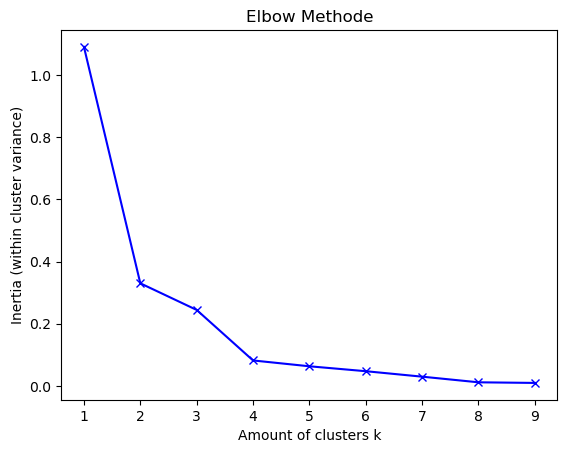

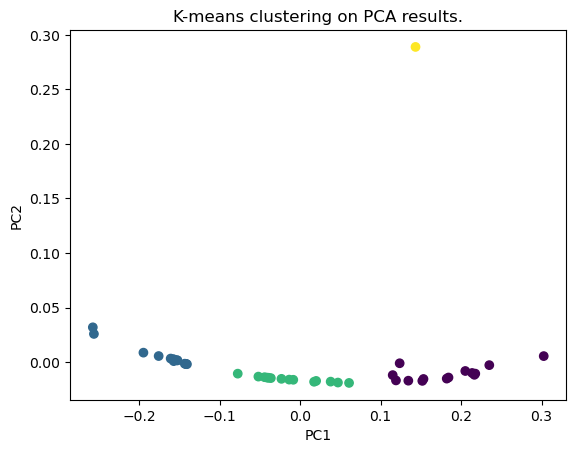

In [14]:
# Transforming results and calculating K-means

pca_result = pca.fit_transform(loadings) 
inertia = []
K_range = range(1,10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_result)
    inertia.append(kmeans.inertia_)

plt.plot(K_range, inertia, 'bx-')
plt.xlabel('Amount of clusters k')
plt.ylabel('Inertia (within cluster variance)')
plt.title('Elbow Methode')
plt.show()

k = 4
kmeans = KMeans(n_clusters=k)
clusters = kmeans.fit_predict(pca_result)

plt.scatter(pca_result[:,0], pca_result[:,1], c=clusters, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-means clustering on PCA results.')
plt.show()


### TSNE

Node: d5a5fc09, aantal samples: 1000
Node: 7f3747b5, aantal samples: 1000
Node: ba36d475, aantal samples: 1000
Node: 0eb86326, aantal samples: 1000
Node: fe2955c5, aantal samples: 1000


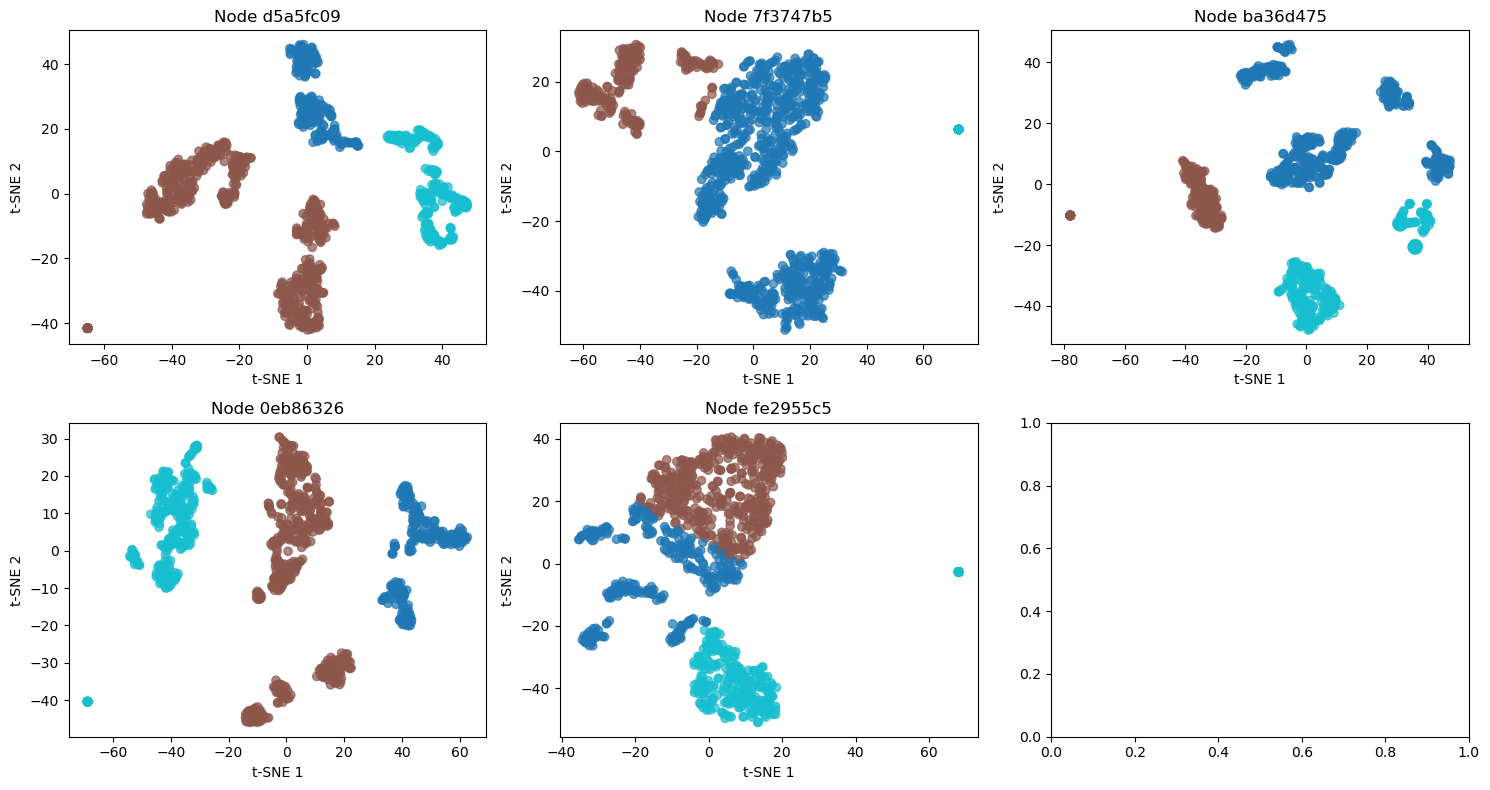

In [ ]:
# Tsne

#First, a test on a selection of the dataset
n_cols = 3
n_rows = math.ceil(len(nodes) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4), squeeze=False)
tsne_results = {}

for i,node in enumerate(nodes):
    subset = df_24e[df_24e['node_name'] == node]
    subset = subset[selected_features].fillna(0)
    subset = subset.sample(n=1000, random_state=42)
    print(f"Node: {node}, aantal samples: {len(subset)}")

    # Optional: standaardiseren
    scaler = StandardScaler()
    scaled = scaler.fit_transform(subset)

    tsne = TSNE(n_components=2, random_state=42, perplexity=30)
    tsne_result = tsne.fit_transform(scaled)
    
    kmeans = KMeans(n_clusters=3, random_state=42)  # Pas aan op basis van clusters die je ziet
    labels = kmeans.fit_predict(tsne_result)
    row = i // n_cols
    col = i % n_cols
    ax = axes[row][col]
    scatter = ax.scatter(tsne_result[:, 0], tsne_result[:, 1], c=labels, cmap='tab10', alpha=0.7)
    ax.set_title(f'Node {node}')
    ax.set_xlabel('t-SNE 1')
    ax.set_ylabel('t-SNE 2')
    tsne_results[node] = tsne.fit_transform(scaled)

fig.tight_layout()
plt.show()
    

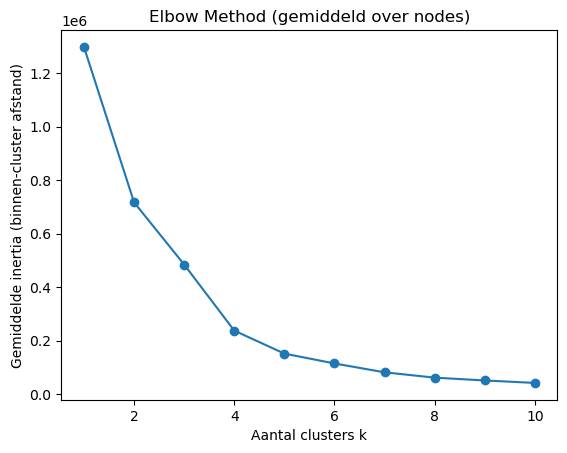

In [20]:
# Calculating amoutn of clusters
k_range = range(1, 11)
all_inertia = {k: [] for k in k_range}

for node in tsne_results:
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(tsne_results[node])
        all_inertia[k].append(kmeans.inertia_)

avg_inertia = [np.mean(all_inertia[k]) for k in k_range]

plt.plot(k_range, avg_inertia, marker='o')
plt.xlabel('Aantal clusters k')
plt.ylabel('Gemiddelde inertia (binnen-cluster afstand)')
plt.title('Elbow Method (gemiddeld over nodes)')
plt.show()

### Clusters

In [30]:
# Round 2: TSNE on the entire dataset

results = {}

nodes = df_clean_24e['node_name'].unique()
k = 4  # Based upon the elbow method

for node in nodes:
    subset_2 = df_clean_24e[df_clean_24e['node_name'] == node]
    features = subset_2[selected_features].fillna(0)


    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(features)

    subset = subset_2.copy()
    subset['cluster'] = labels

    results[node] = subset
    tsne = TSNE(n_components=2, random_state=42, perplexity=5)
    tsne_result = tsne.fit_transform(features)

    # Figure
    plt.figure(figsize=(6,4))
    plt.scatter(tsne_result[:,0], tsne_result[:,1], c=labels, cmap='tab10', alpha=0.7)
    plt.title(f't-SNE & KMeans clusters for node {node}')
    plt.xlabel('t-SNE 1')
    plt.ylabel('t-SNE 2')
    plt.colorbar()
    plt.show()

    # Easy acces
    with open('cluster_results.pkl', 'wb') as f:
        pickle.dump(results, f)



KeyboardInterrupt: 

In [31]:
# Clusters explained

with open('cluster_results.pkl', 'rb') as f:
    results = pickle.load(f)


features_of_interest = [
    'cpu_usage_percent',
    'scaphandre_power_total_watts',
    'ipmi_system_power_watts',
    'rapl_power_total_watts',
    'scaphandre_power_total_watts'

]

for node, df_node in results.items():
    print(f"\nNode: {node}")
    
    for cluster in sorted(df_node['cluster'].unique()):
        print(f"Cluster {cluster}:")       
        cluster_data = df_node[df_node['cluster'] == cluster]
        
        for feature in features_of_interest:
            min_val = cluster_data[feature].min()
            max_val = cluster_data[feature].max()
            mean_val = cluster_data[feature].mean()
            
            print(f"{feature}: min={min_val:.2f}, max={max_val:.2f}, mean={mean_val:.2f}")



Node: d5a5fc09
Cluster 0:
cpu_usage_percent: min=0.07, max=7.96, mean=0.16
scaphandre_power_total_watts: min=35.41, max=101.03, mean=45.05
ipmi_system_power_watts: min=85.00, max=173.33, mean=101.54
rapl_power_total_watts: min=28.99, max=106.43, mean=45.05
scaphandre_power_total_watts: min=35.41, max=101.03, mean=45.05
Cluster 1:
cpu_usage_percent: min=15.19, max=38.87, mean=33.52
scaphandre_power_total_watts: min=237.73, max=300.66, mean=272.54
ipmi_system_power_watts: min=333.33, max=400.83, mean=368.91
rapl_power_total_watts: min=206.62, max=301.57, mean=272.53
scaphandre_power_total_watts: min=237.73, max=300.66, mean=272.54
Cluster 2:
cpu_usage_percent: min=6.23, max=33.63, mean=12.18
scaphandre_power_total_watts: min=166.07, max=259.28, mean=219.90
ipmi_system_power_watts: min=255.00, max=346.67, mean=305.05
rapl_power_total_watts: min=170.87, max=257.36, mean=219.90
scaphandre_power_total_watts: min=166.07, max=259.28, mean=219.90
Cluster 3:
cpu_usage_percent: min=0.82, max=22.

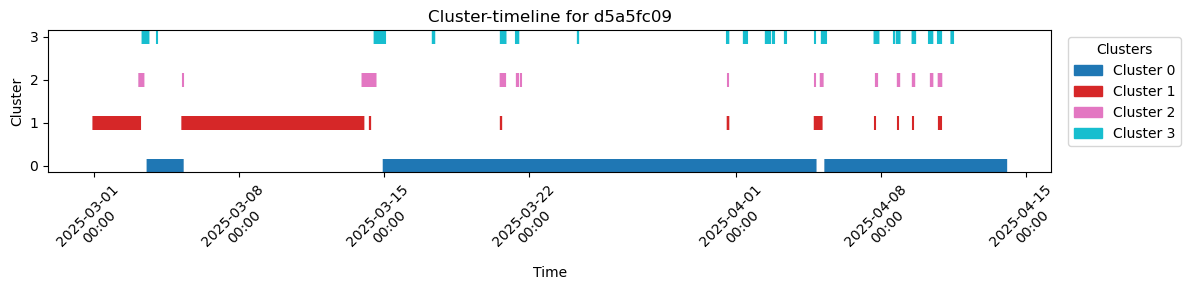

<Figure size 640x480 with 0 Axes>

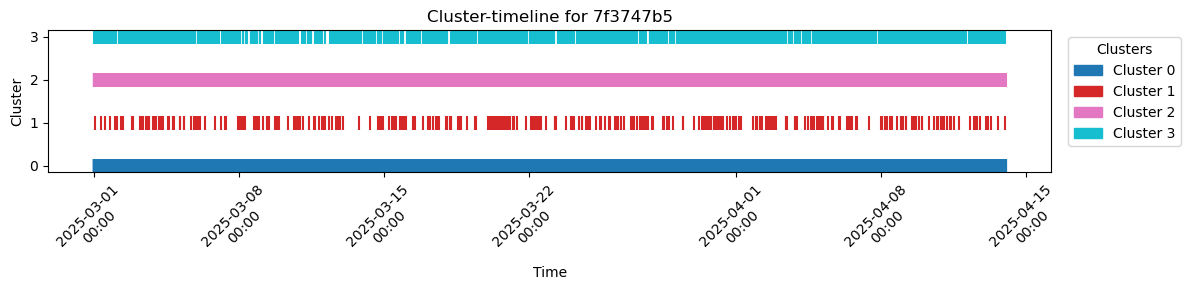

<Figure size 640x480 with 0 Axes>

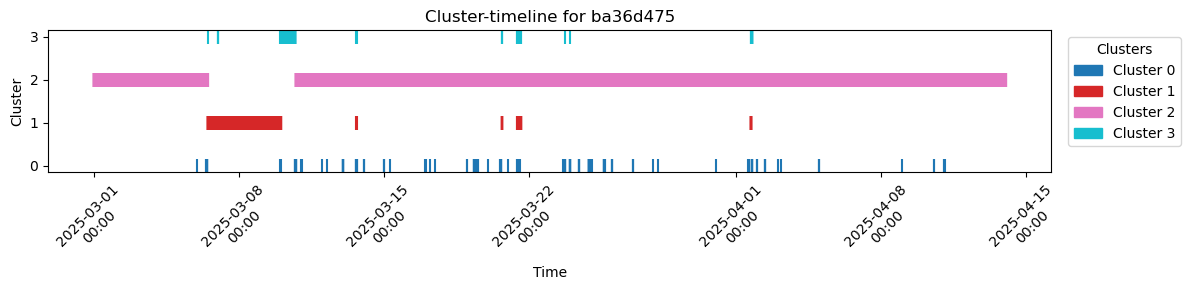

<Figure size 640x480 with 0 Axes>

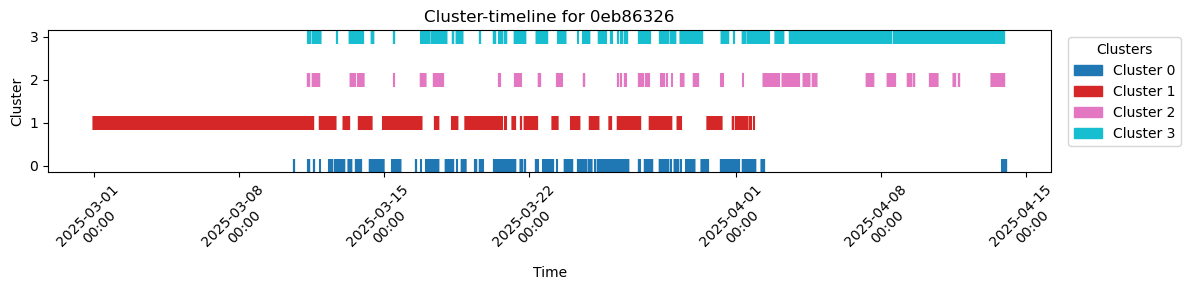

<Figure size 640x480 with 0 Axes>

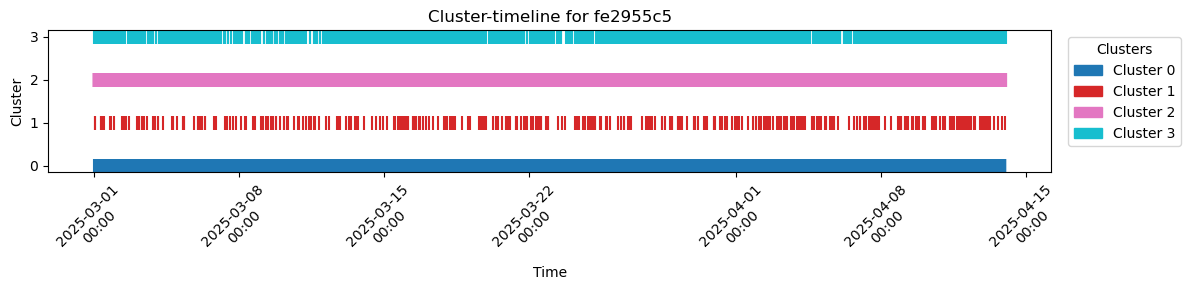

<Figure size 640x480 with 0 Axes>

In [ ]:
# Plotting a timeline for each subset and node

machine_type = 'a97fe24e'
for node, data in results.items():
    data = data.sort_values('timestamp')
    unique_clusters = sorted(data['cluster'].dropna().unique())
    cmap = plt.get_cmap('tab10')
    norm = plt.Normalize(vmin=0, vmax=max(unique_clusters))  

    # Plot for each node
    plt.figure(figsize=(12, 3))
    plt.scatter(
        data['timestamp'],
        data['cluster'],
        c=data['cluster'],
        cmap=cmap,
        norm=norm,
        marker='|',
        s=100
    )

    plt.title(f'Cluster-timeline for {node}')
    plt.xlabel('Time')
    plt.ylabel('Cluster')
    plt.yticks(unique_clusters)
    plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d\n%H:%M'))
    plt.xticks(rotation=45)

    legend_handles = [
        mpatches.Patch(color=cmap(norm(cluster)), label=f'Cluster {cluster}')
        for cluster in unique_clusters
    ]
    plt.legend(handles=legend_handles, title='Clusters', bbox_to_anchor=(1.01, 1), loc='upper left')

    plt.tight_layout()
    plt.show()

    # Save Results
    plt.savefig(f"combined/Timeline/Timeline_clusters_{machine_type}_{node}.png") 


### Virtual machines

In [33]:
vms = set(df_clean_24e['vm_id'].unique())
vcpus_vms = df_vms[df_vms["vm_id"].astype(str).isin(vms)]


node_to_vms = df_clean_24e.groupby('node_name')['vm_id'].unique().to_dict()
node_to_vms = {node: list(vms) for node, vms in node_to_vms.items()}

node_to_vms

{'0eb86326': ['ef84013a'],
 '7f3747b5': [nan],
 'ba36d475': ['44d23cb7'],
 'd5a5fc09': ['6bb1bb72'],
 'fe2955c5': [nan]}

### Results

In [38]:
with open('cluster_results.pkl', 'rb') as f:
    results = pickle.load(f)

df_clusters = pd.concat(results.values())

df_clusters['timestamp'] = pd.to_datetime(df_clusters['timestamp'])
df_clean_24e['timestamp'] = pd.to_datetime(df_clean_24e['timestamp'])


df_clean_24e_merge = pd.merge(df_clean_24e, 
                     df_clusters[['timestamp', 'node_name', 'cluster']], 
                     on=['node_name', 'timestamp'], 
                     how='left')

agg_df_power = df_clean_24e_merge.groupby(['node_name', 'cluster'])['ipmi_system_power_watts'].agg(
    mean_power='mean',
    sum_power='sum',
    count_power='size'
).reset_index()

agg_df_rapl = df_clean_24e_merge.groupby(['node_name', 'cluster'])[
 'rapl_power_total_watts'].agg(
    mean_rapl='mean',
    sum_rapl='sum',
    count_rapl='size'
).reset_index()

agg_df_scaphandre = df_clean_24e_merge.groupby(['node_name', 'cluster'])[
 'scaphandre_power_total_watts'].agg(
    mean_scaphandre='mean',
    sum_scaphandre='sum',
    count_scaphandre='size'
).reset_index()
    


agg_df_cpu = df_clean_24e_merge.groupby(['node_name', 'cluster'])['cpu_usage_percent'].agg(
    mean_cpu='mean',
    sum_cpu='sum',
    count_cpu='size'
).reset_index()



# Merging

agg_dfs = [agg_df_power, agg_df_rapl, agg_df_scaphandre, agg_df_cpu]
agg_merged = reduce(lambda left, right: pd.merge(left, right, on=['node_name', 'cluster'], how='outer'), agg_dfs)


agg_merged.to_csv(f"combined/Statistics/Statistics_{machine_type}.csv", index=False)

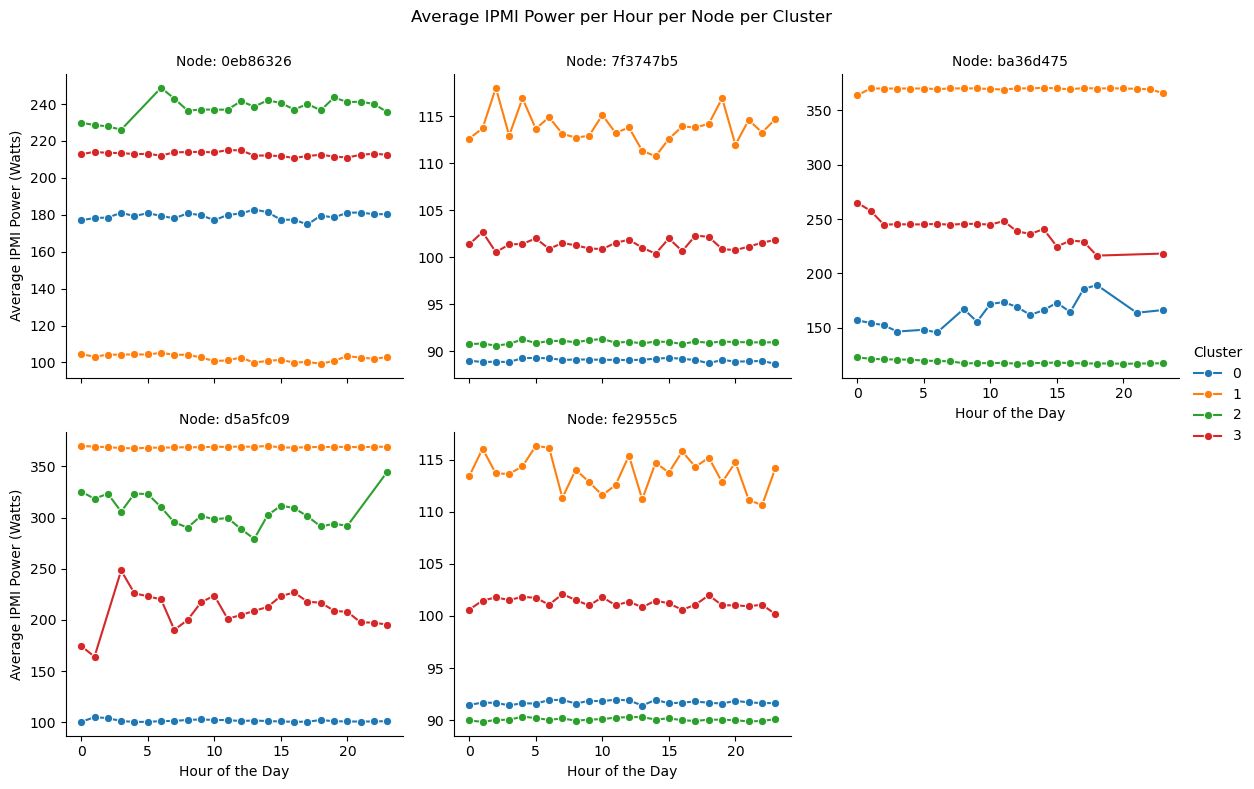

In [35]:
hourly_df = df_clean_24e_merge.groupby(['node_name','cluster','hour'])['ipmi_system_power_watts'].mean().reset_index()

g = sns.FacetGrid(hourly_df, col="node_name", col_wrap=3, height=4, sharey=False)
g.map_dataframe(sns.lineplot, x='hour', y='ipmi_system_power_watts', hue='cluster', marker='o', palette='tab10')

g.set_titles(col_template="Node: {col_name}")
g.set_axis_labels('Hour of the Day', 'Average IPMI Power (Watts)')
g.add_legend(title="Cluster")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Average IPMI Power per Hour per Node per Cluster')
plt.show()


hourly_df.to_csv(f"combined/cpu_energy/energy_{node}.csv", index=False)

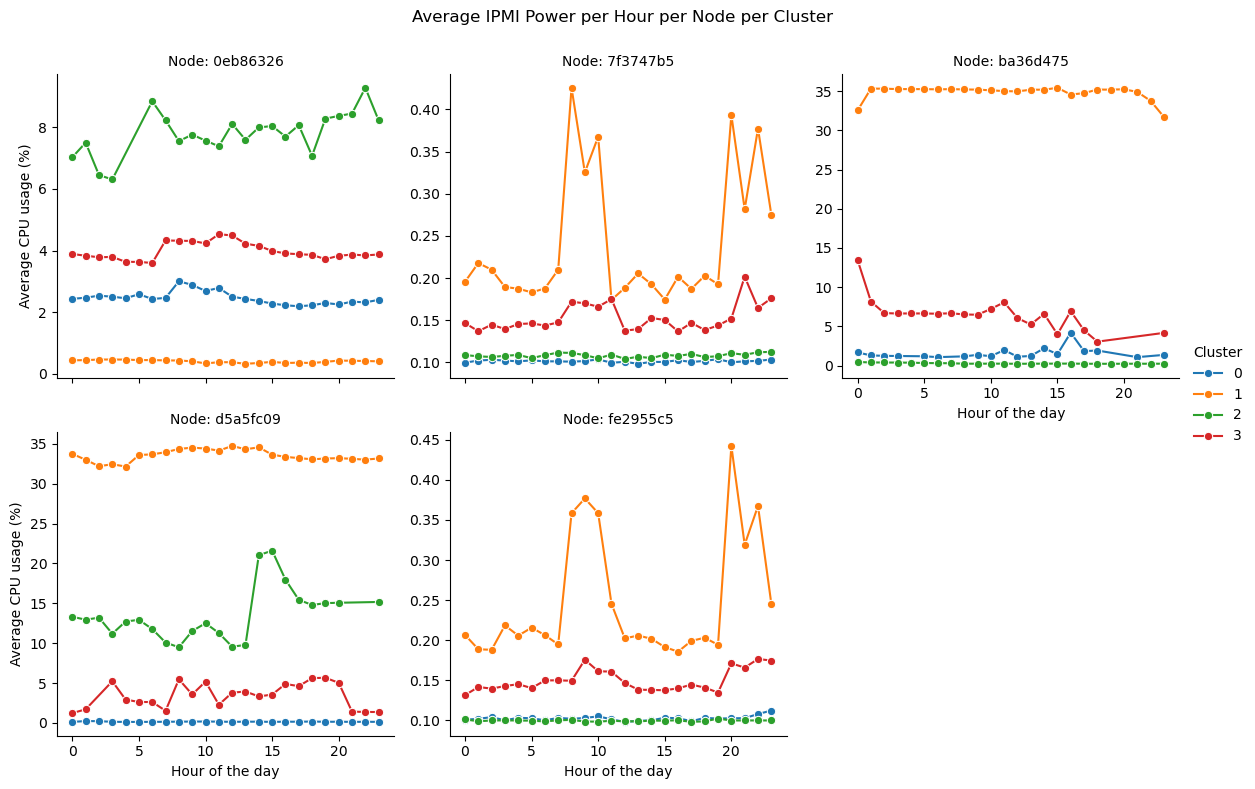

In [36]:
hourly_df_cpu = df_clean_24e_merge.groupby(['node_name','cluster','hour'])['cpu_usage_percent'].mean().reset_index()

g = sns.FacetGrid(hourly_df_cpu, col="node_name", col_wrap=3, height=4, sharey=False)
g.map_dataframe(sns.lineplot, x='hour', y='cpu_usage_percent', hue='cluster', marker='o', palette='tab10')

g.set_titles(col_template="Node: {col_name}")
g.set_axis_labels('Hour of the day', 'Average CPU usage (%)')
g.add_legend(title="Cluster")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Average IPMI Power per Hour per Node per Cluster")
plt.show()


hourly_df_cpu.to_csv(f"combined/cpu_energy/cpu_{node}.csv", index=False)

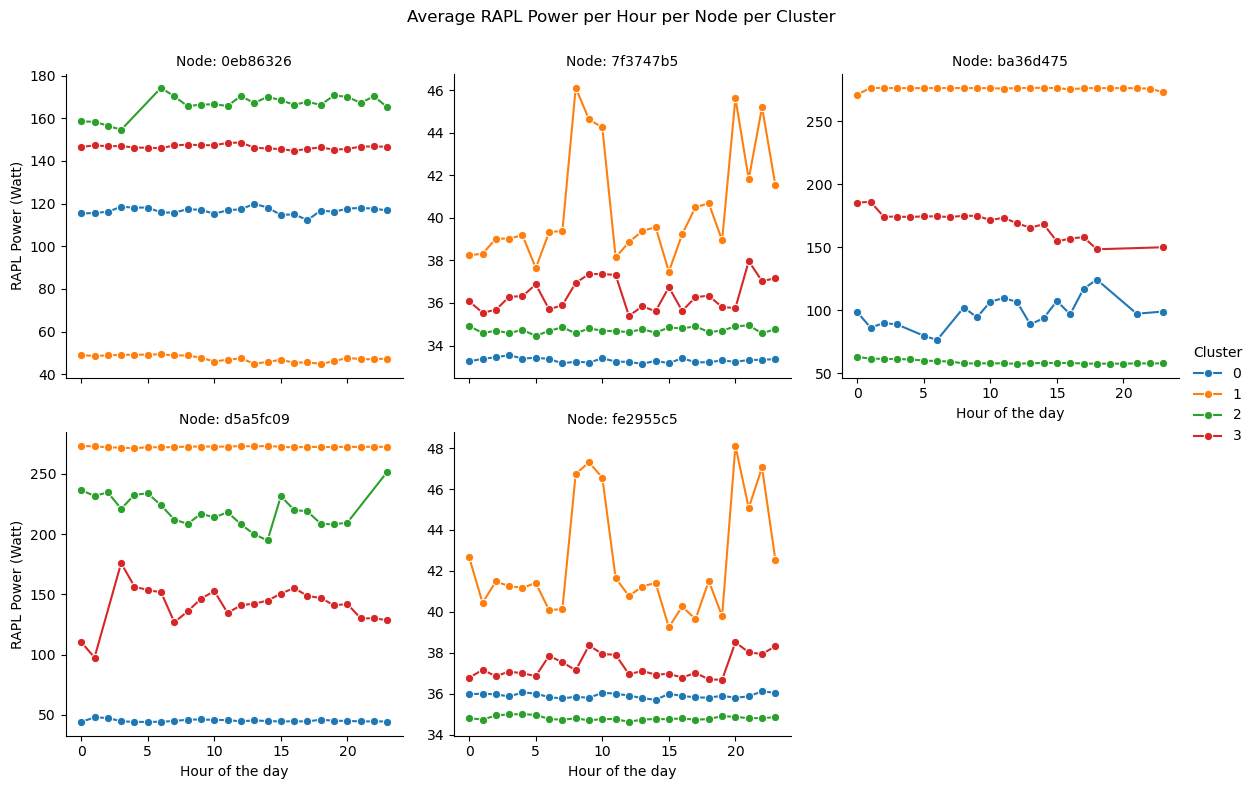

In [43]:
hourly_df_rapl = df_clean_24e_merge.groupby(['node_name','cluster','hour'])['rapl_power_total_watts'].mean().reset_index()

g = sns.FacetGrid(hourly_df_rapl, col="node_name", col_wrap=3, height=4, sharey=False)
g.map_dataframe(sns.lineplot, x='hour', y='rapl_power_total_watts', hue='cluster', marker='o', palette='tab10')

g.set_titles(col_template="Node: {col_name}")
g.set_axis_labels('Hour of the day', 'RAPL Power (Watt)')
g.add_legend(title="Cluster")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Average RAPL Power per Hour per Node per Cluster")
plt.show()


hourly_df_cpu.to_csv(f"combined/cpu_energy/rapl{node}.csv", index=False)

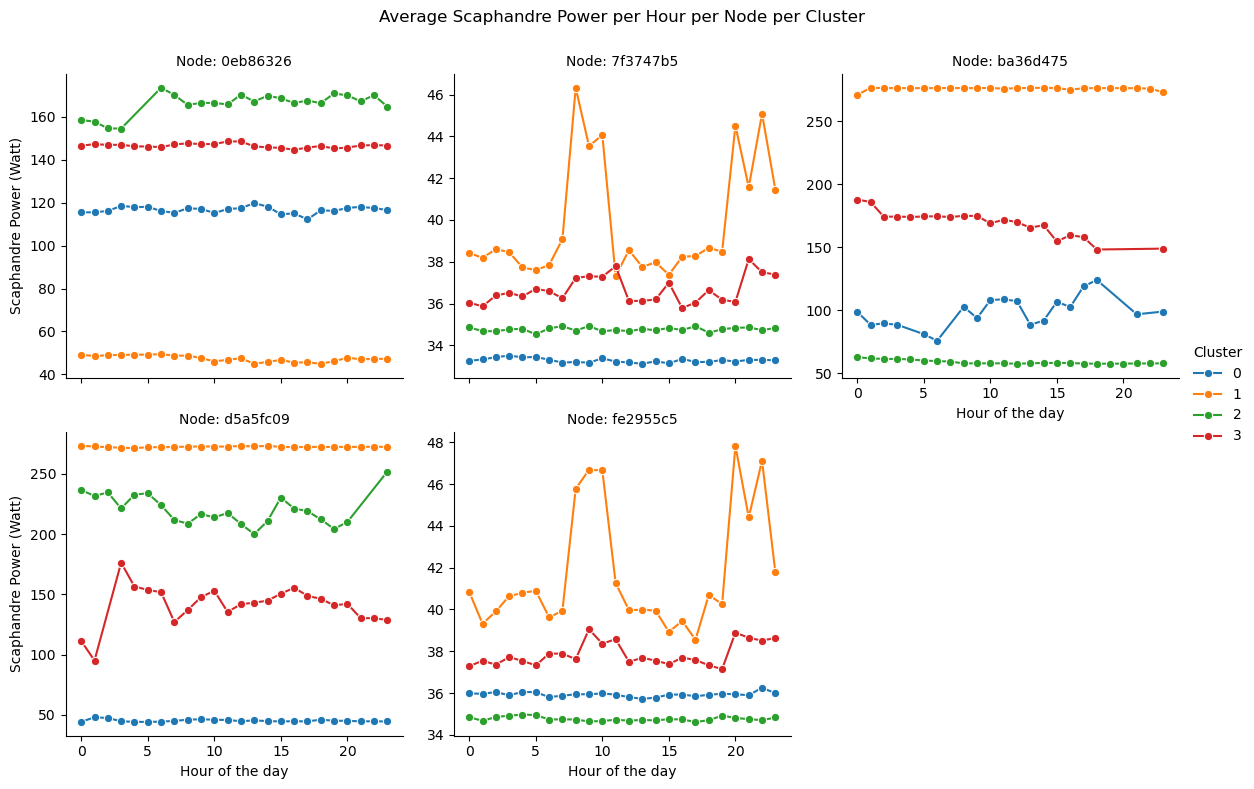

In [42]:
hourly_df_scap = df_clean_24e_merge.groupby(['node_name','cluster','hour'])['scaphandre_power_total_watts'].mean().reset_index()

g = sns.FacetGrid(hourly_df_scap, col="node_name", col_wrap=3, height=4, sharey=False)
g.map_dataframe(sns.lineplot, x='hour', y='scaphandre_power_total_watts', hue='cluster', marker='o', palette='tab10')

g.set_titles(col_template="Node: {col_name}")
g.set_axis_labels('Hour of the day', 'Scaphandre Power (Watt)')
g.add_legend(title="Cluster")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Average Scaphandre Power per Hour per Node per Cluster")
plt.show()


hourly_df_cpu.to_csv(f"combined/cpu_energy/scap{node}.csv", index=False)

# DF 747

In [107]:
df = df_569
machine_type = 'b8994569'

df['date'] = df['timestamp'].dt.date
print(len(df['date']))


missing = df.isnull().mean().sort_values(ascending=False) * 100
df = df.dropna(subset=['ipmi_system_power_watts'])
df = df.dropna(subset=['scaphandre_vm_power_total_watts'])
missing = df.isnull().mean().sort_values(ascending=False) * 100
print(missing[missing > 0])


1120094
network_bw_rx_b/s             0.003030
network_bw_tx_b/s             0.003030
rapl_power_total_watts        0.000505
rapl_power_dram_1_watts       0.000505
rapl_power_dram_0_watts       0.000505
rapl_power_package_1_watts    0.000505
rapl_power_package_0_watts    0.000505
dtype: float64


## Basics


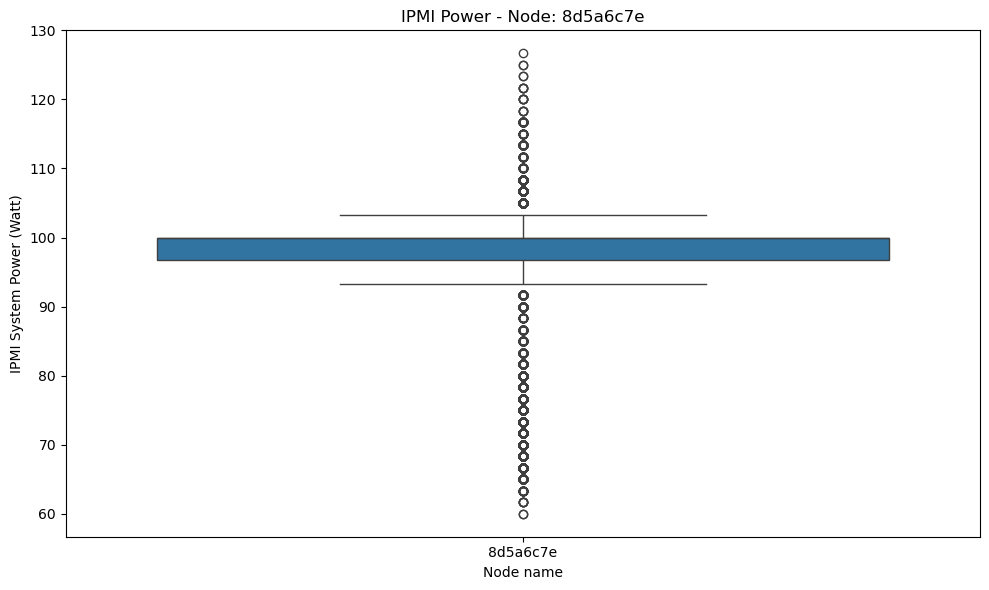

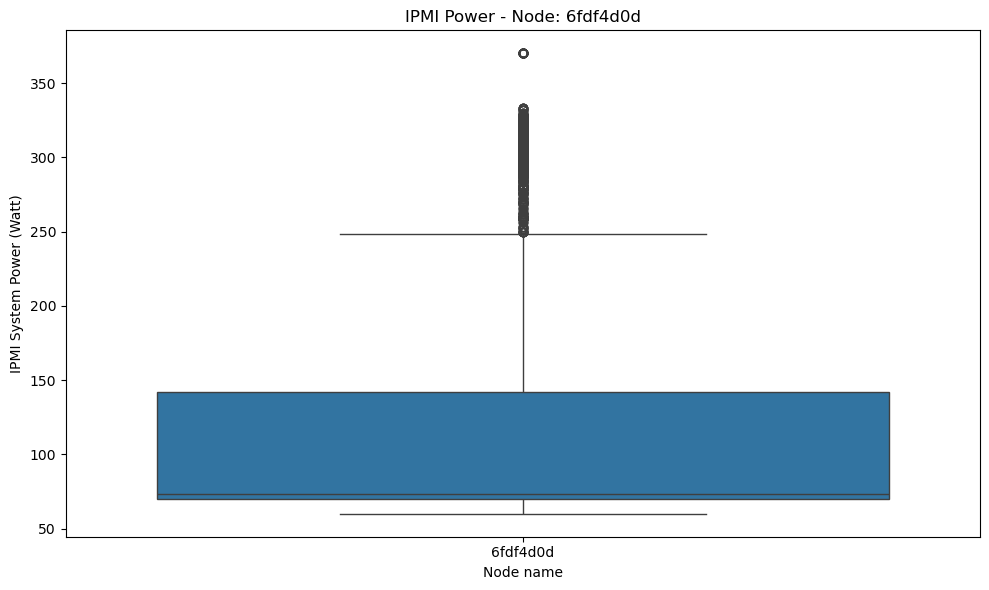

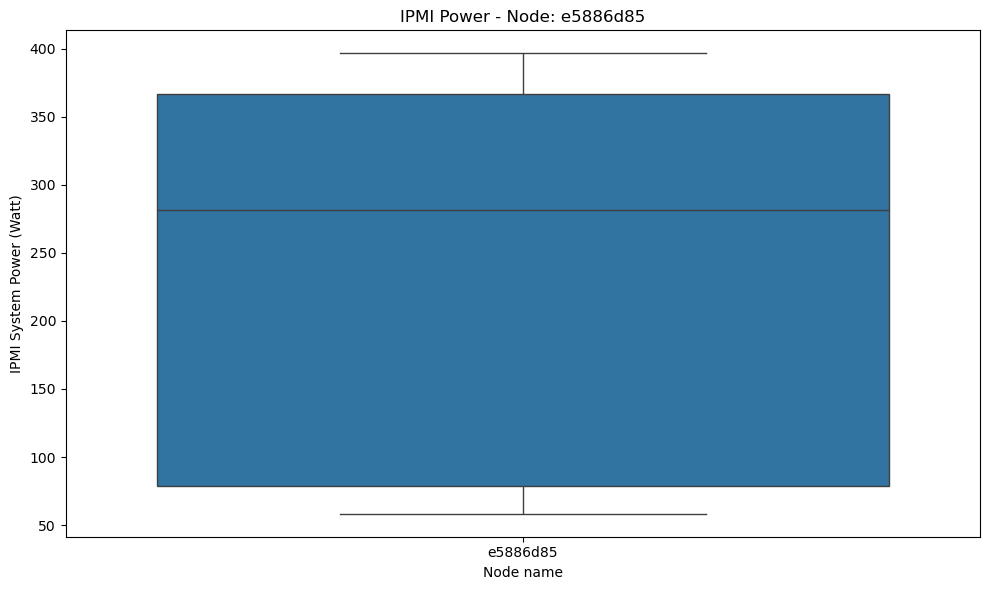

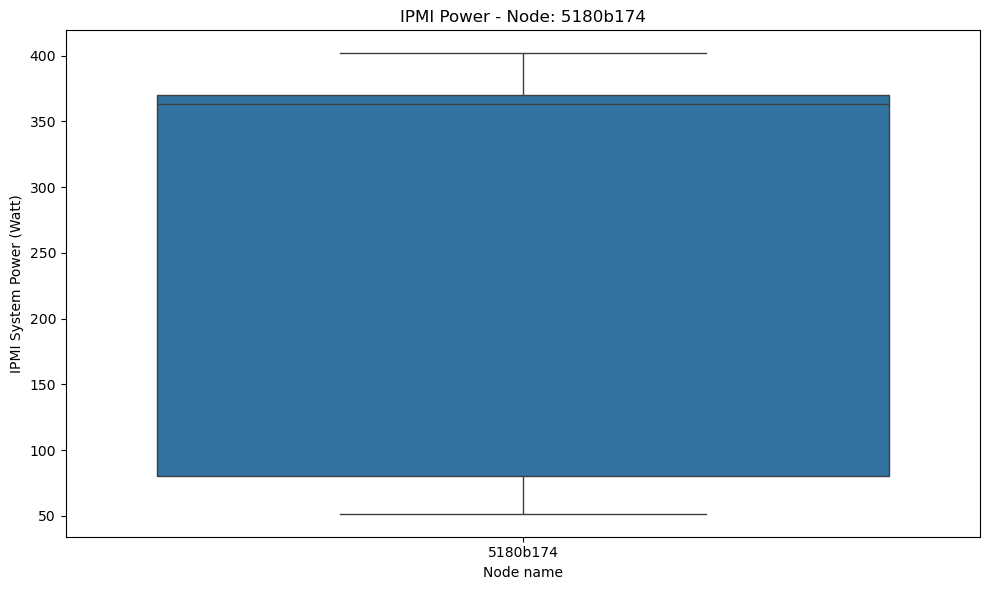

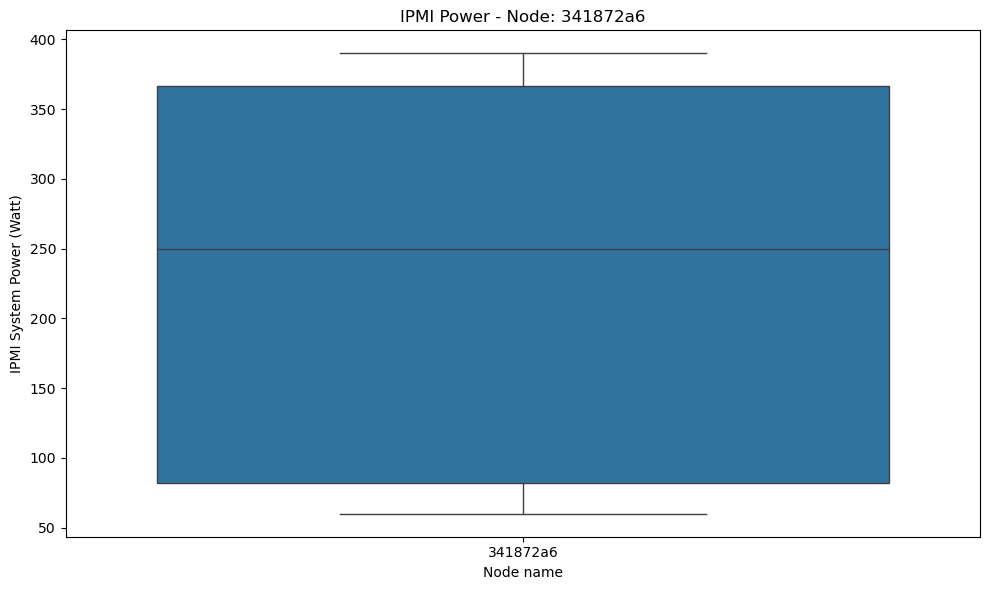

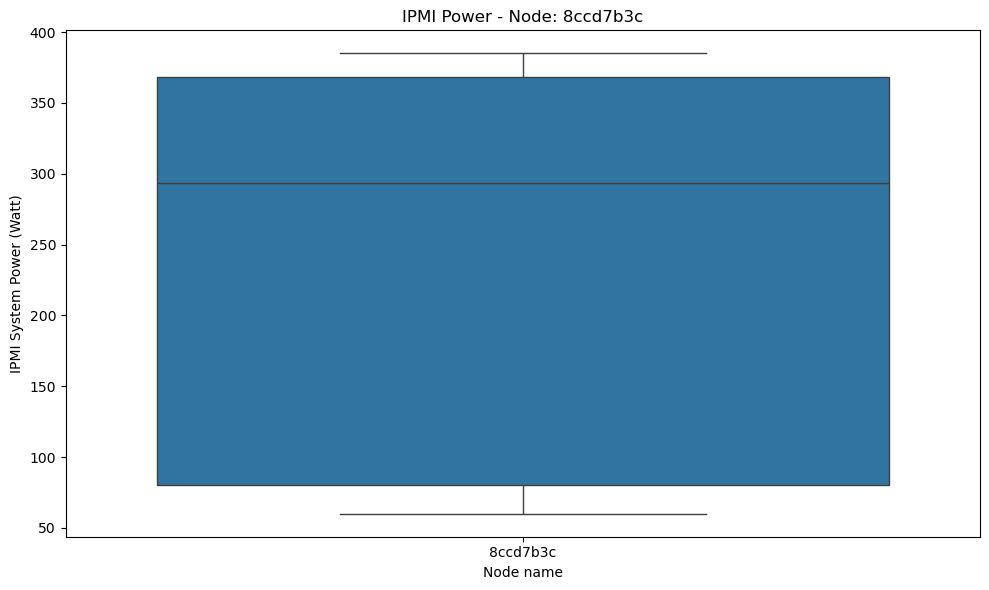

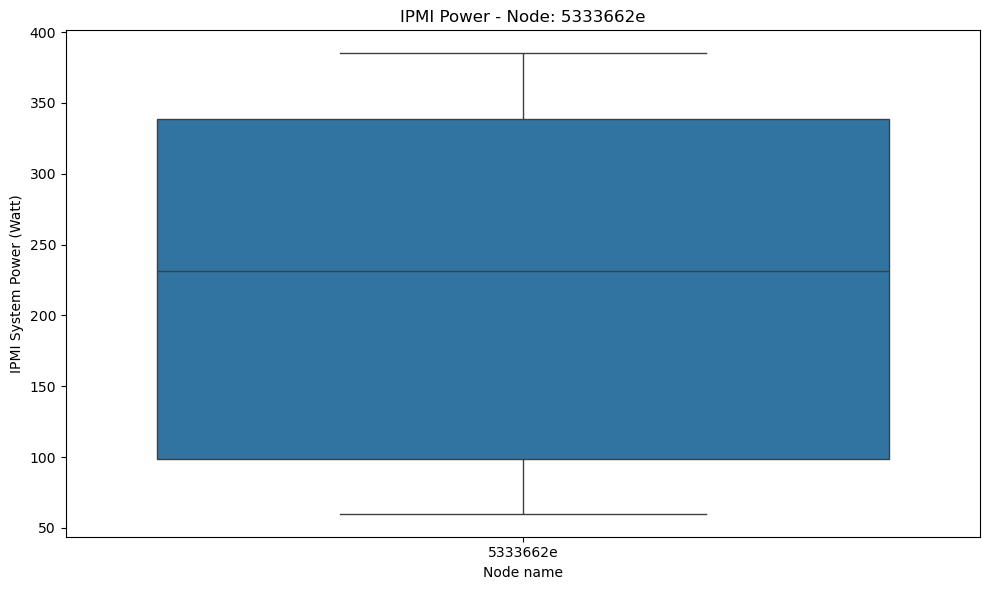

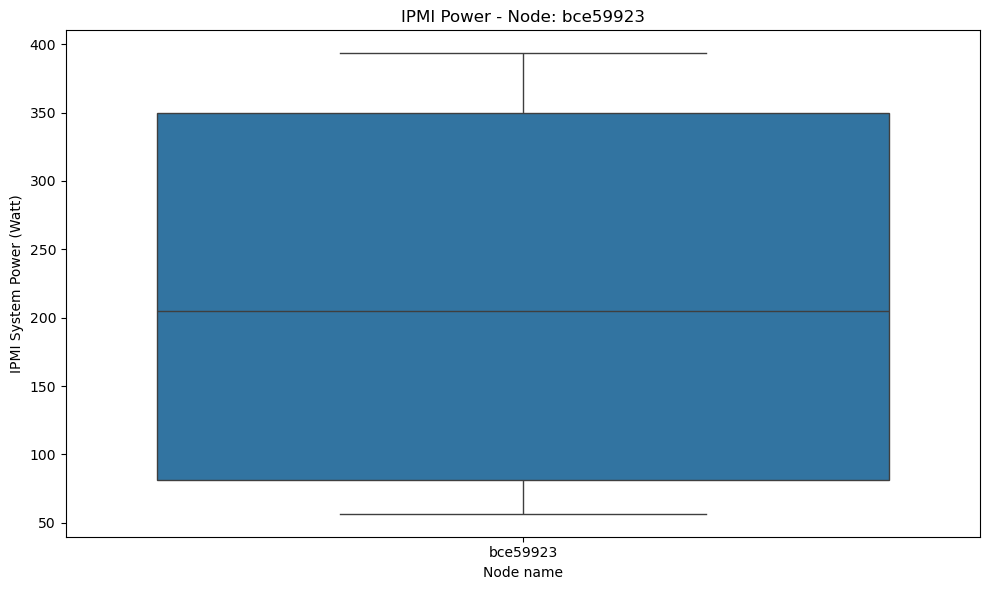

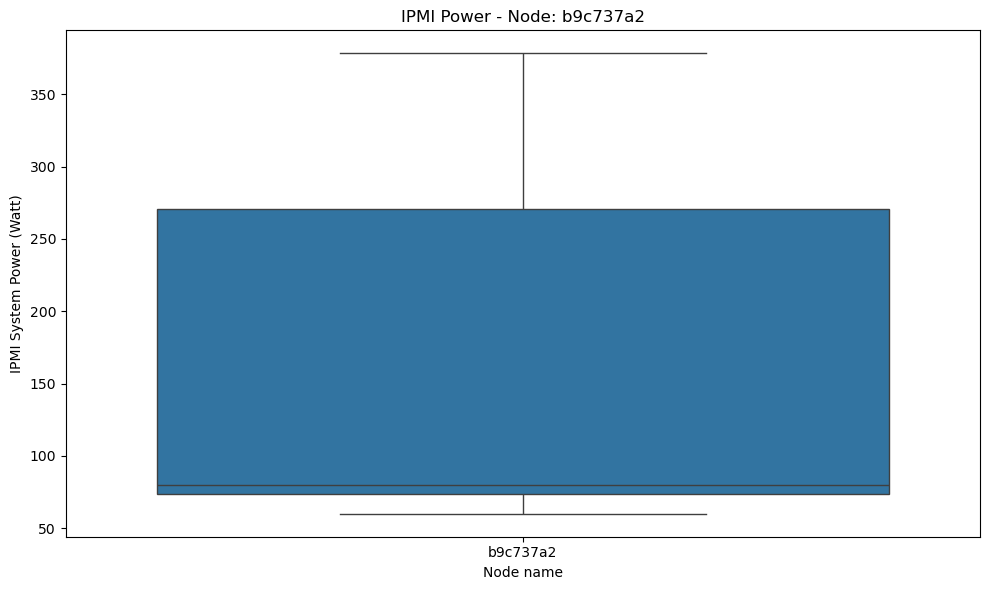

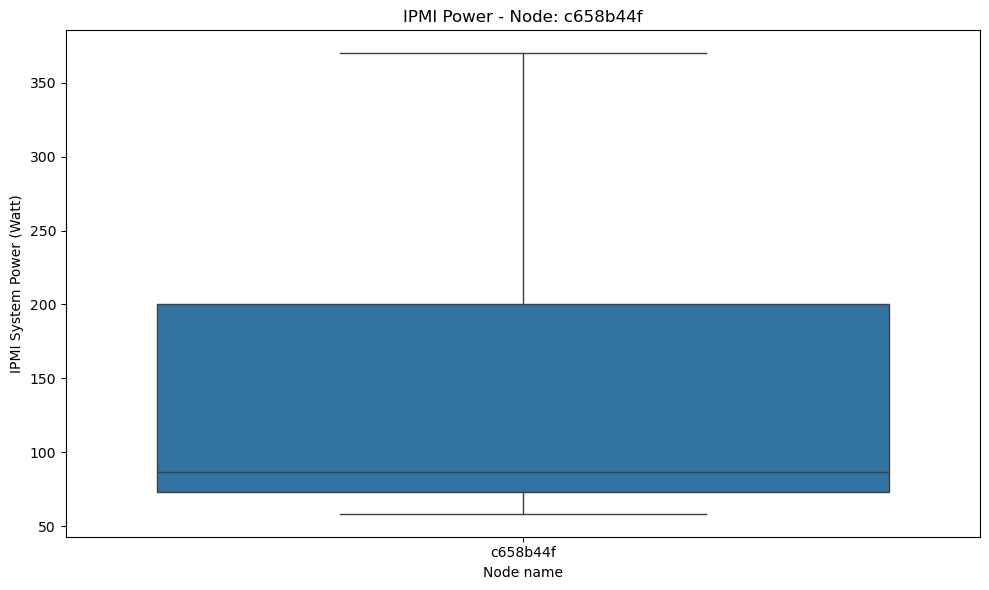

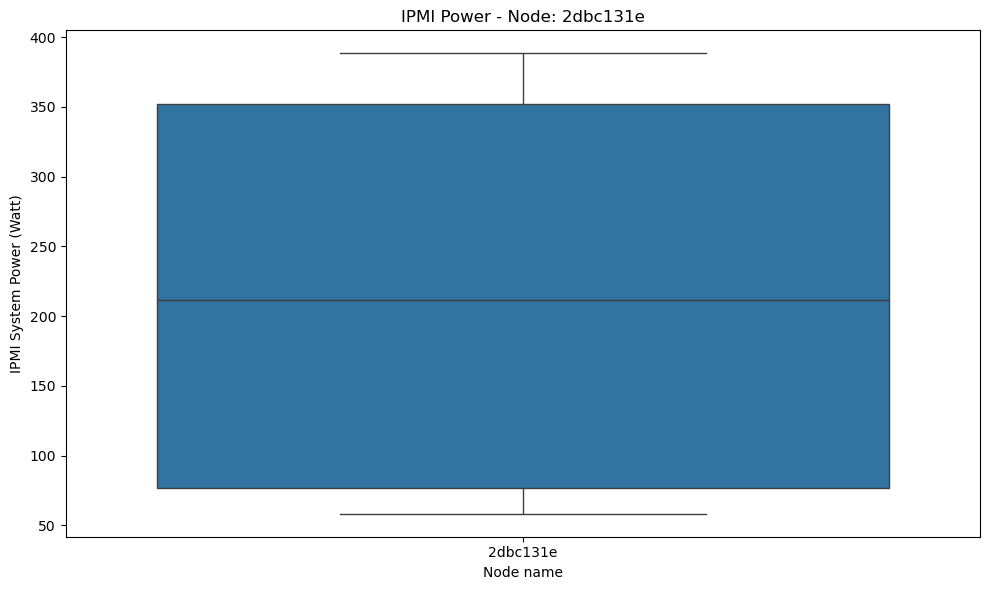

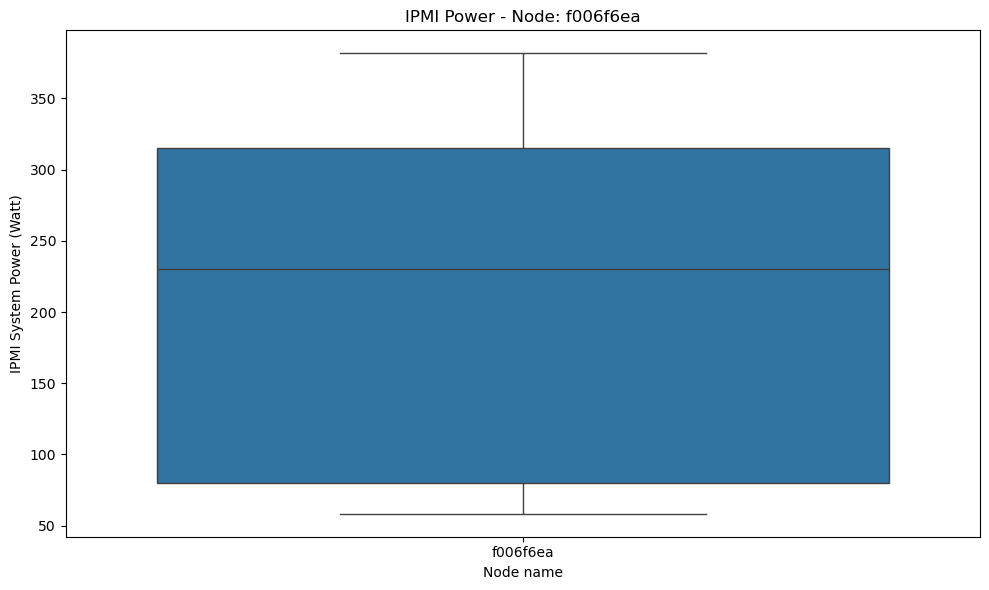

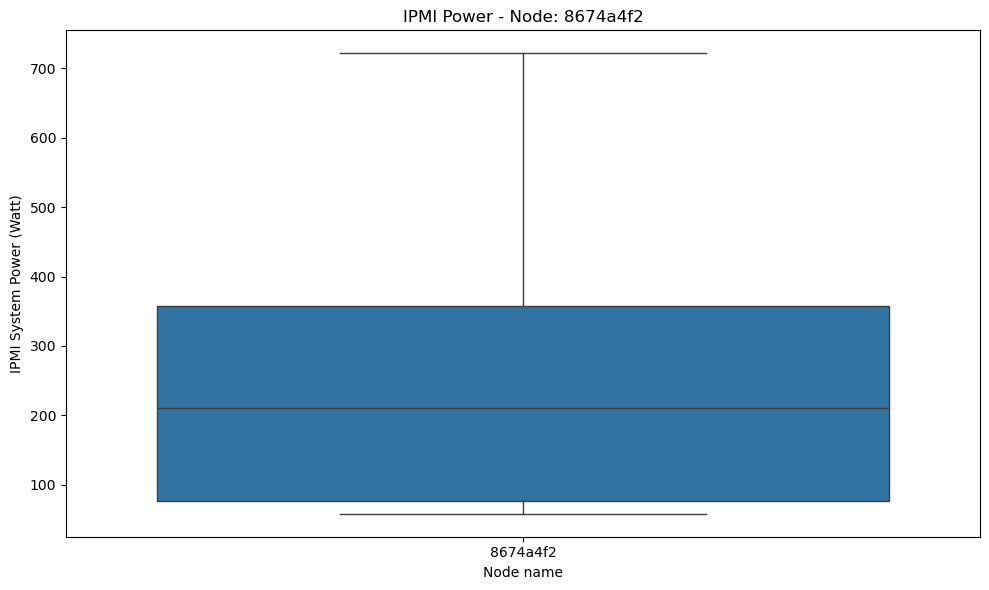

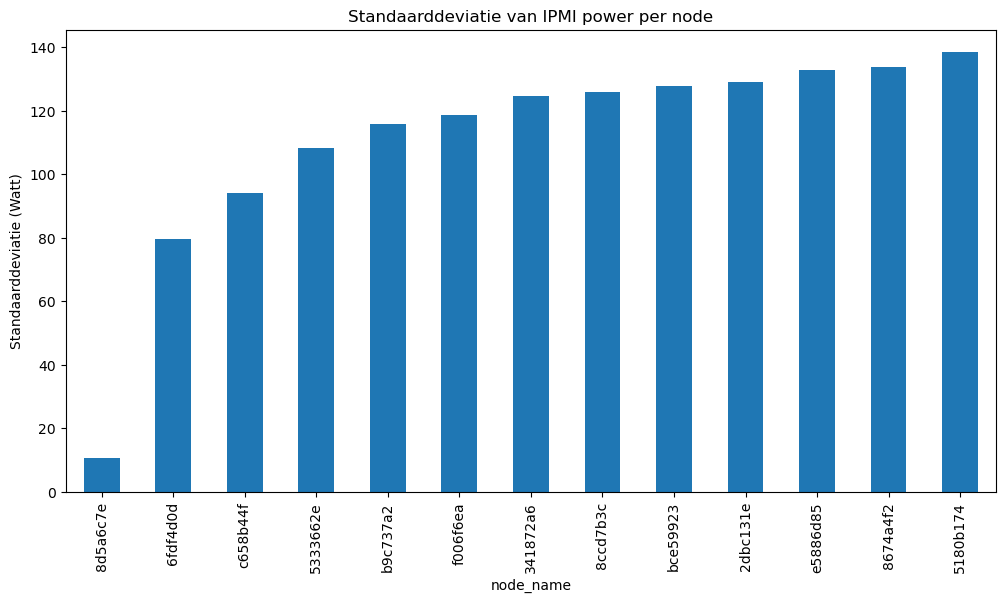

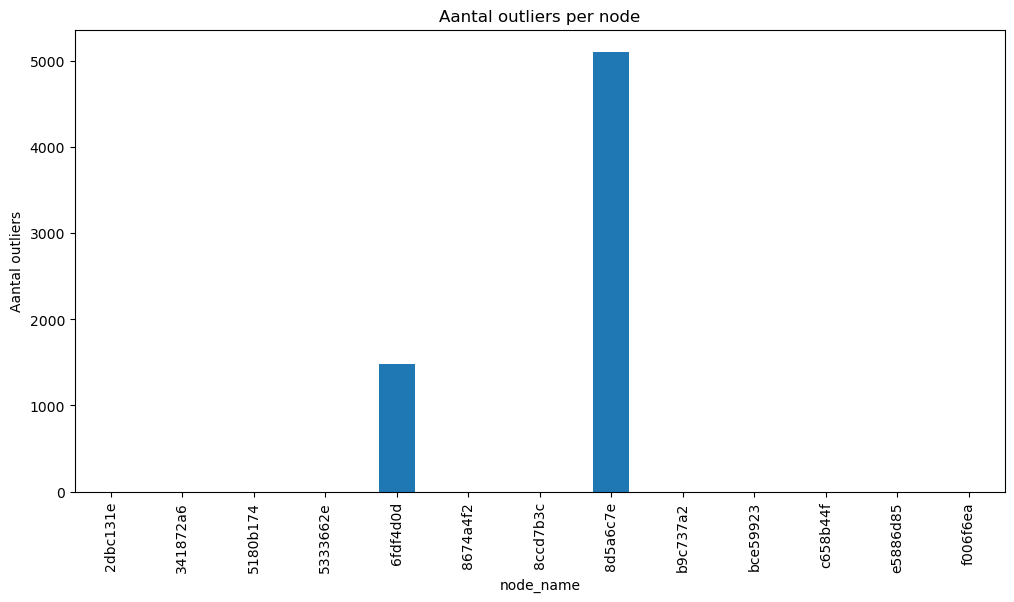

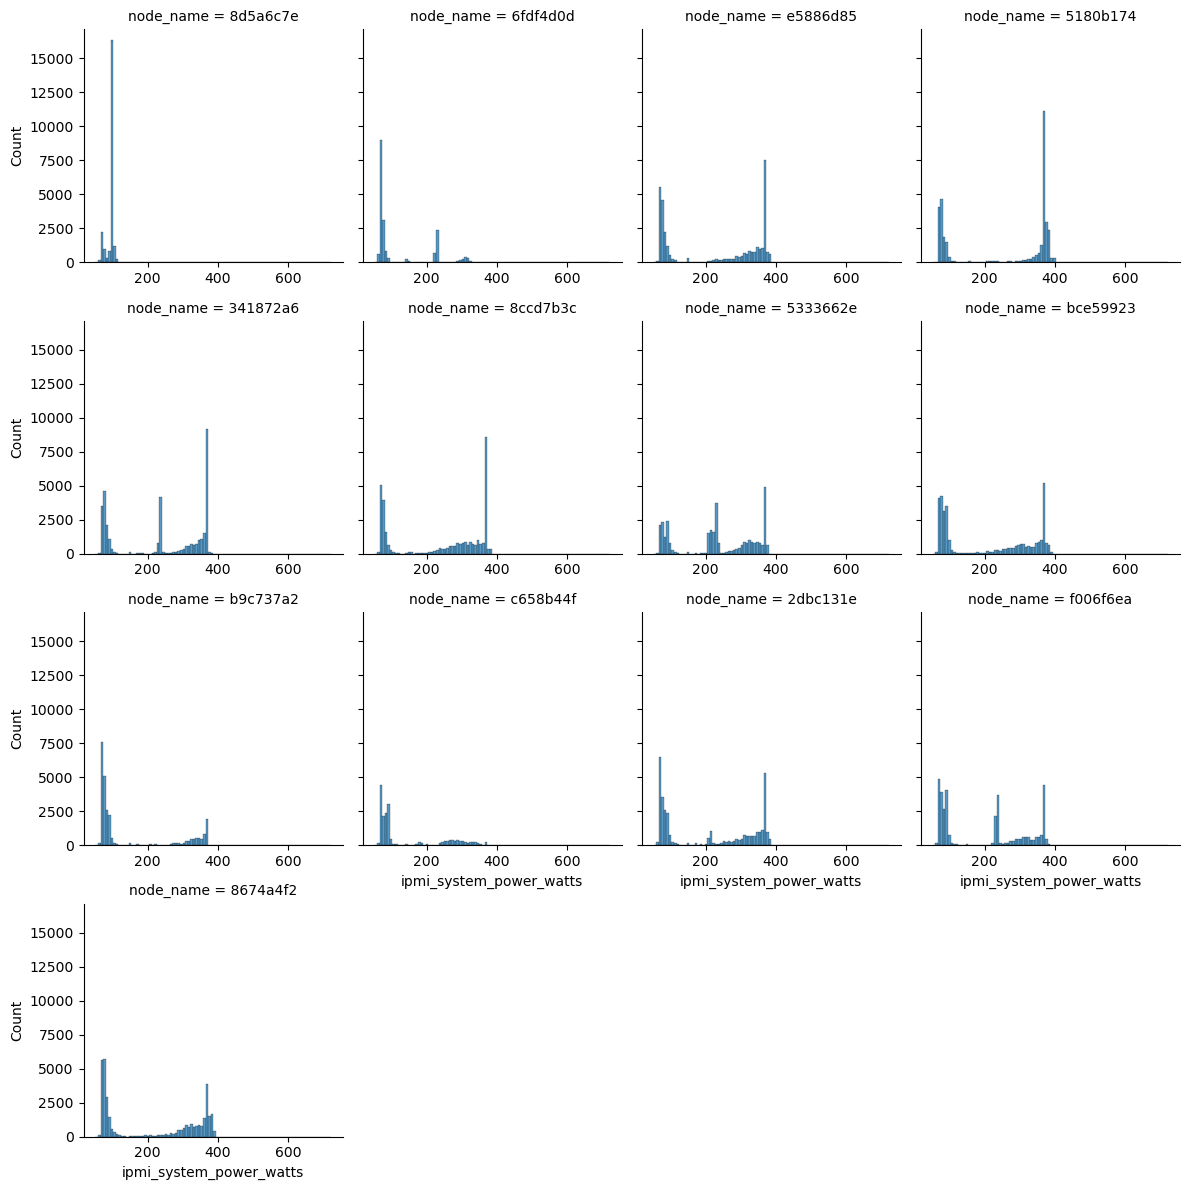

In [108]:
# Basic information about the node

nodes = df['node_name'].unique()

for node in nodes:
    subset = df[df['node_name'] == node]
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='node_name', y='ipmi_system_power_watts', data=subset)
    plt.title(f'IPMI Power - Node: {node}')
    plt.xlabel('Node name')
    plt.ylabel('IPMI System Power (Watt)')
    plt.tight_layout()
    plt.show()

stds = df.groupby('node_name')['ipmi_system_power_watts'].std().sort_values()

stds.plot(kind='bar', figsize=(12, 6), title='Standaarddeviatie van IPMI power per node')
plt.ylabel('Standaarddeviatie (Watt)')
plt.show()
def count_outliers(group):
    q1 = group.quantile(0.25)
    q3 = group.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return ((group < lower) | (group > upper)).sum()

outlier_counts = df.groupby('node_name')['ipmi_system_power_watts'].apply(count_outliers)
outlier_counts.plot(kind='bar', figsize=(12, 6), title='Aantal outliers per node')
plt.ylabel('Aantal outliers')
plt.show()


g = sns.displot(
    df,
    x='ipmi_system_power_watts',
    col='node_name',
    col_wrap=4,
    height=3,
    facet_kws={'sharex': False}
)
g.savefig(f'combined/Statistics/power_distribution_per_node_{machine_type}.png', dpi=300)

In [113]:
# Calculating correlations between ipmi_system_power_watts and the rest of the dataset
num_df = df_24e.select_dtypes(include='number')

corr = num_df.corr()
strong_corr = corr['ipmi_system_power_watts'].abs()
strong_corr = strong_corr[strong_corr > 0.6]

print('Highly correlated features with ipmi_system_power_watts (> 0.6):')
print(strong_corr)

# Selected_features based upon strong_corr

selected_features = [
    'cpu_usage_percent',              
    'cpu_softirq_percent',          
    'load_shortterm_percent',       
    'ipmi_cpu_power_watts',          
    'ipmi_memory_power_watts',  
    'ipmi_system_power_watts',   
    # 'ipmi_psu1_ac_in_power_watts', 
    'rapl_power_total_watts',    
    'rapl_power_dram_0_watts',       
    'scaphandre_power_total_watts',   
    'scaphandre_vm_power_total_watts' 
]


Highly correlated features with ipmi_system_power_watts (> 0.6):
cpu_usage_percent                  0.923177
cpu_idle_percent                   0.923177
cpu_softirq_percent                0.636013
cpu_user_percent                   0.918378
load_shortterm_percent             0.922811
load_midterm_percent               0.922636
load_longterm_percent              0.921986
ipmi_system_power_watts            1.000000
ipmi_cpu_power_watts               0.995999
ipmi_memory_power_watts            0.906938
ipmi_fan_power_watts               0.783475
ipmi_psu1_ac_in_power_watts        0.995127
ipmi_psu2_ac_in_power_watts        0.994314
ipmi_psu1_dc_out_power_watts       0.993231
ipmi_psu2_dc_out_power_watts       0.994349
rapl_power_total_watts             0.996917
rapl_power_package_0_watts         0.993489
rapl_power_package_1_watts         0.996217
rapl_power_dram_0_watts            0.910437
rapl_power_dram_1_watts            0.905206
scaphandre_power_total_watts       0.997280
scaphandre_

## PCA


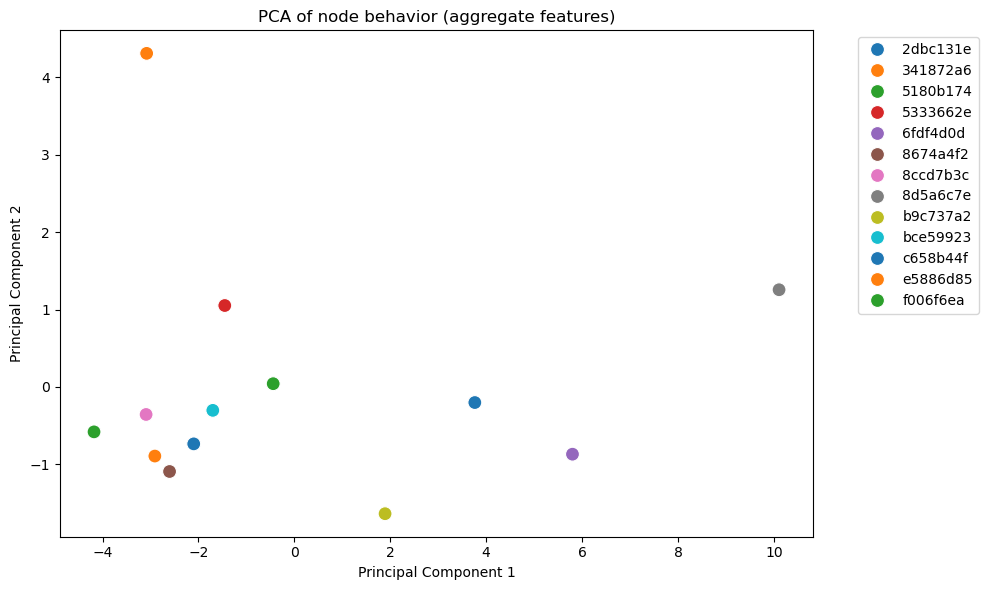

                                        PC1       PC2
cpu_softirq_percent_mean          -0.059091  0.637207
cpu_softirq_percent_std           -0.061805  0.588121
rapl_power_dram_0_watts_mean      -0.230887  0.113936
ipmi_system_power_watts_mean      -0.236408  0.110576
ipmi_cpu_power_watts_mean         -0.237250  0.109003
scaphandre_power_total_watts_mean -0.237136  0.107865
rapl_power_total_watts_mean       -0.237141  0.107840
ipmi_memory_power_watts_mean      -0.232896  0.087156
cpu_usage_percent_mean            -0.239358  0.056864
load_shortterm_percent_mean       -0.238795  0.048735
                                       PC1       PC2
cpu_softirq_percent_mean         -0.059091  0.637207
cpu_softirq_percent_std          -0.061805  0.588121
ipmi_memory_power_watts_std      -0.226041 -0.210294
rapl_power_dram_0_watts_std      -0.226688 -0.198951
ipmi_cpu_power_watts_std         -0.229778 -0.141734
rapl_power_total_watts_std       -0.229964 -0.141445
scaphandre_power_total_watts_std -0

In [114]:
# PCA

agg_df = df.groupby('node_name')[selected_features].agg(['mean', 'std']).fillna(0)
agg_df.columns = ['_'.join(col) for col in agg_df.columns]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(agg_df)

pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(components, columns=['PC1', 'PC2'], index=agg_df.index)
pca_df['node_name'] = pca_df.index

plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='node_name', palette='tab10', s=100)
plt.title('PCA of node behavior (aggregate features)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

loadings = pd.DataFrame({
    'PC1': pca.components_[0],
    'PC2': pca.components_[1]
}, index=agg_df.columns)

print(loadings.sort_values(by='PC2', ascending=False).head(10))  
print(loadings.sort_values(by='PC1', ascending=False).head(10))  

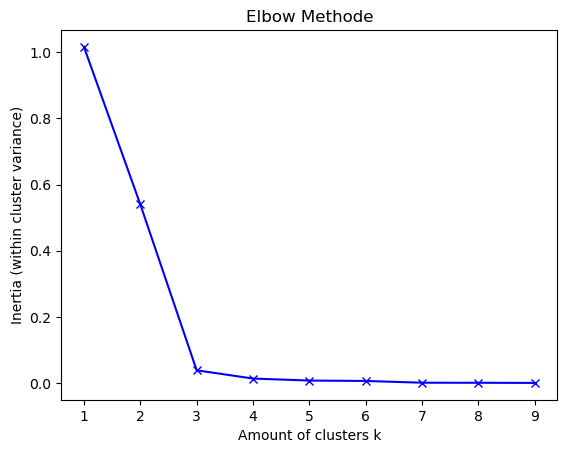

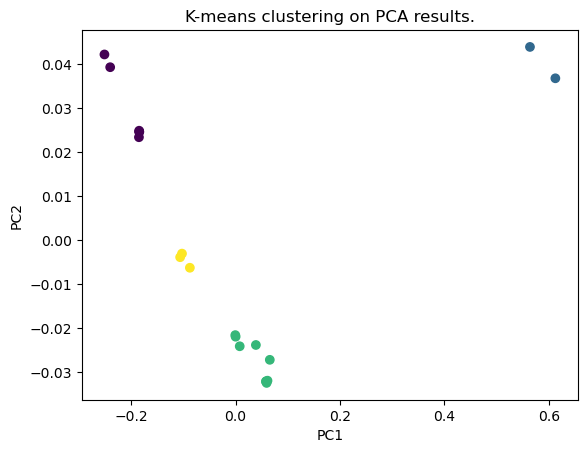

In [115]:
# Transforming results and calculating K-means

pca_result = pca.fit_transform(loadings) 
inertia = []
K_range = range(1,10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_result)
    inertia.append(kmeans.inertia_)

plt.plot(K_range, inertia, 'bx-')
plt.xlabel('Amount of clusters k')
plt.ylabel('Inertia (within cluster variance)')
plt.title('Elbow Methode')
plt.show()

k = 4
kmeans = KMeans(n_clusters=k)
clusters = kmeans.fit_predict(pca_result)

plt.scatter(pca_result[:,0], pca_result[:,1], c=clusters, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-means clustering on PCA results.')
plt.show()


## t-SNE


Node: 8d5a6c7e, aantal samples: 1000
Node: 6fdf4d0d, aantal samples: 1000
Node: e5886d85, aantal samples: 1000
Node: 5180b174, aantal samples: 1000
Node: 341872a6, aantal samples: 1000
Node: 8ccd7b3c, aantal samples: 1000
Node: 5333662e, aantal samples: 1000
Node: bce59923, aantal samples: 1000
Node: b9c737a2, aantal samples: 1000
Node: c658b44f, aantal samples: 1000
Node: 2dbc131e, aantal samples: 1000
Node: f006f6ea, aantal samples: 1000
Node: 8674a4f2, aantal samples: 1000


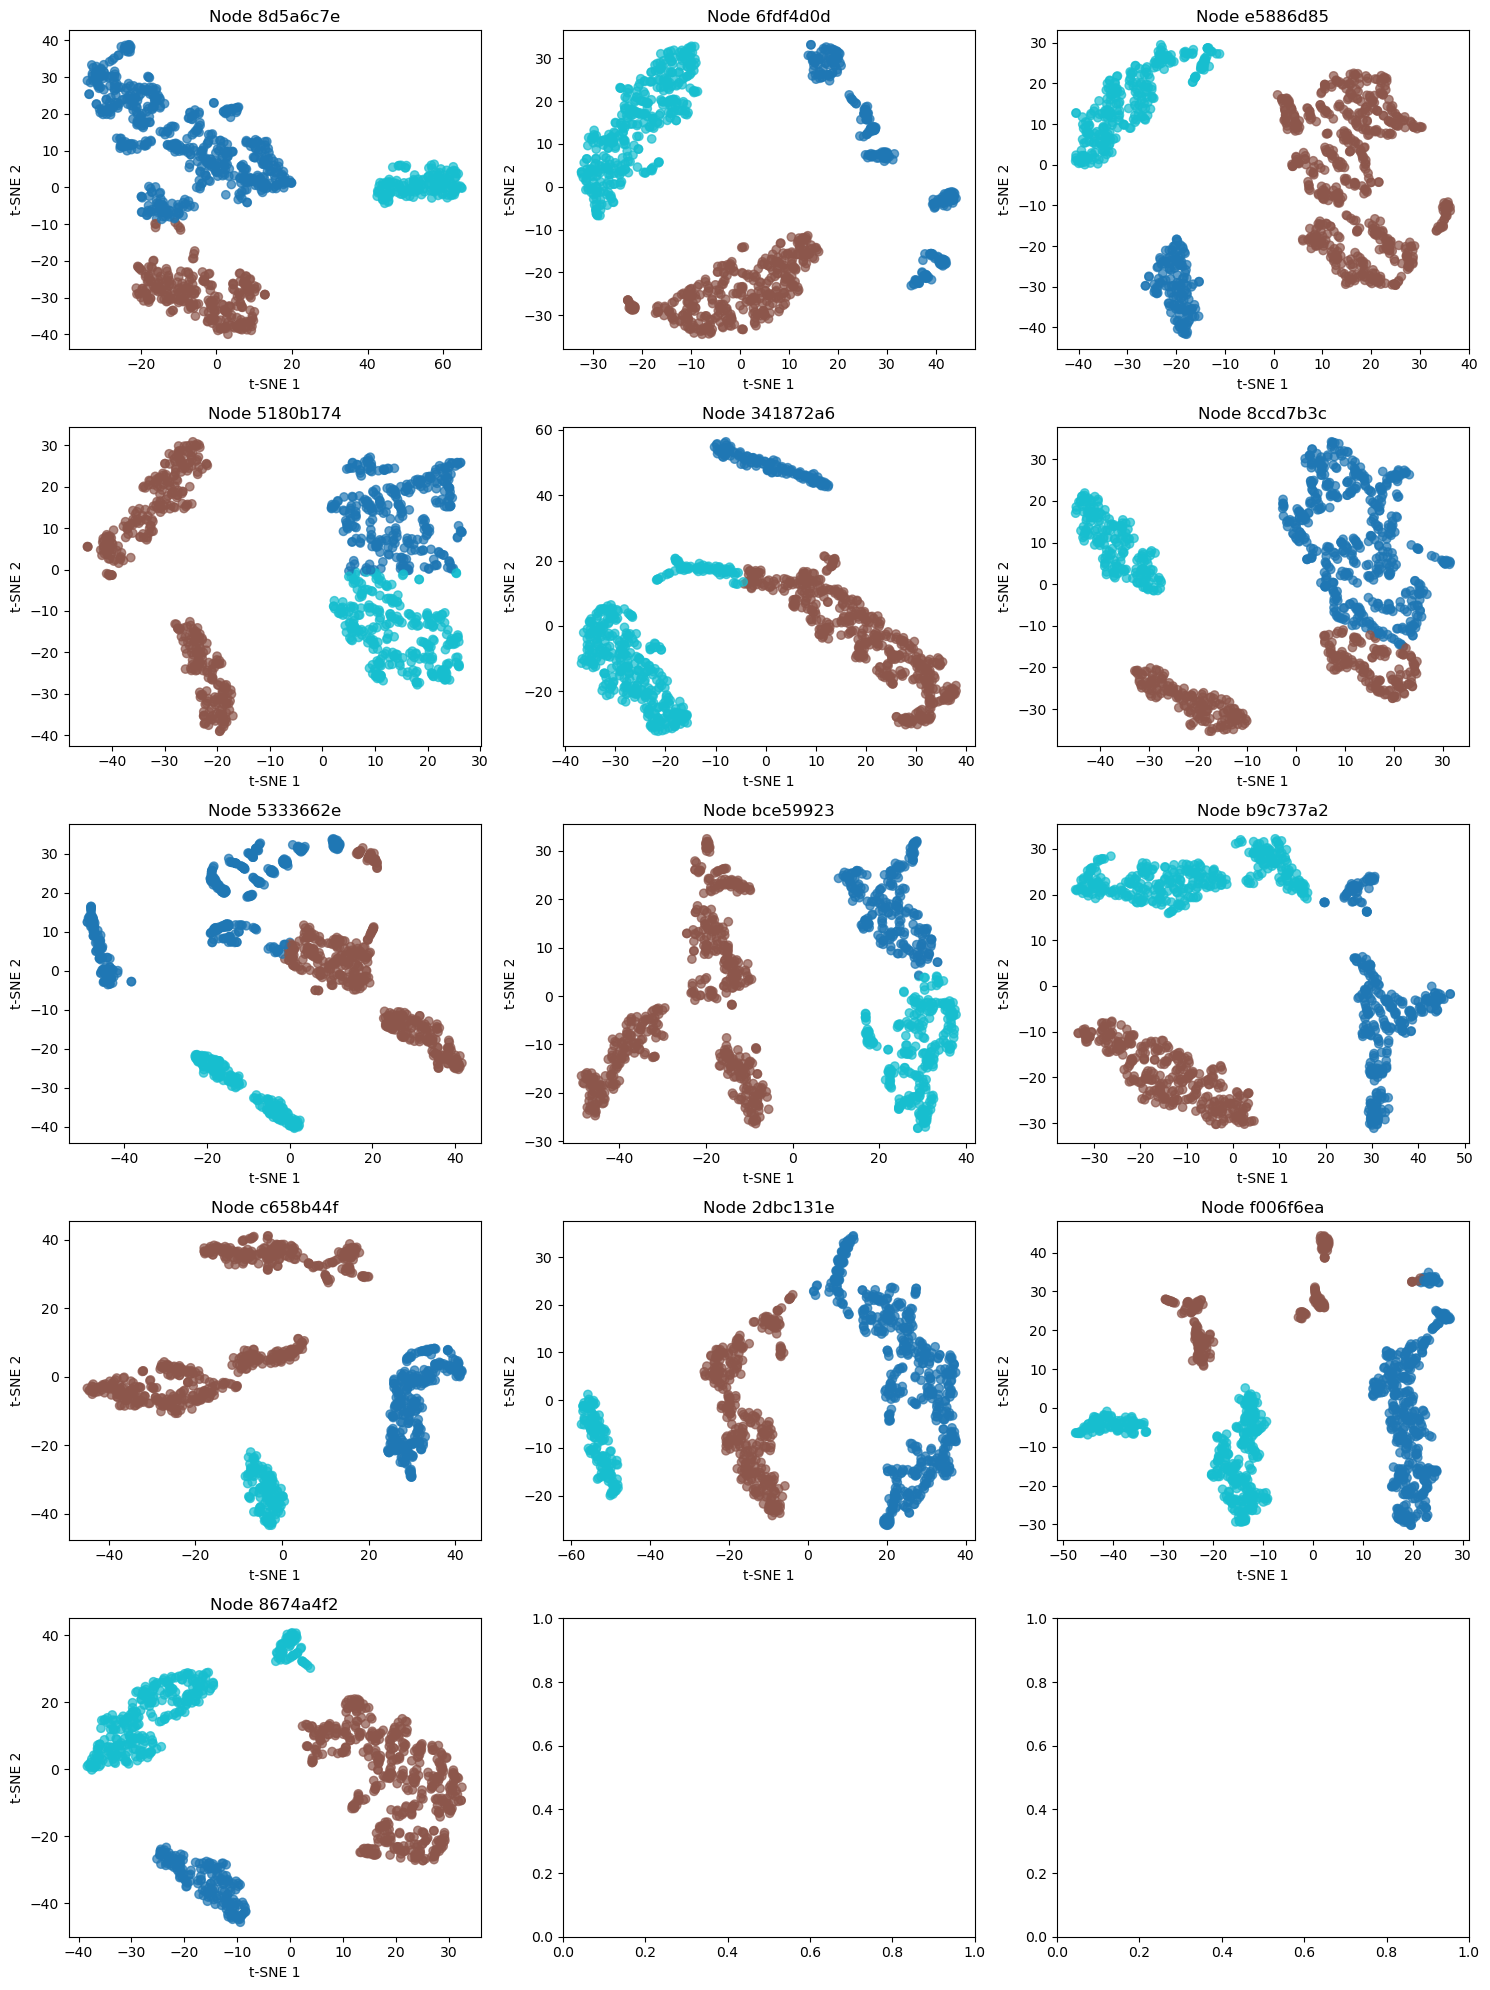

In [116]:
# Tsne

#First, a test on a selection of the dataset
n_cols = 3
n_rows = math.ceil(len(nodes) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4), squeeze=False)
tsne_results = {}

for i,node in enumerate(nodes):
    subset = df[df['node_name'] == node]
    subset = subset[selected_features].fillna(0)
    subset = subset.sample(n=1000, random_state=42)
    print(f"Node: {node}, aantal samples: {len(subset)}")

    # Optional: standaardiseren
    scaler = StandardScaler()
    scaled = scaler.fit_transform(subset)

    tsne = TSNE(n_components=2, random_state=42, perplexity=30)
    tsne_result = tsne.fit_transform(scaled)
    
    kmeans = KMeans(n_clusters=3, random_state=42)  # Pas aan op basis van clusters die je ziet
    labels = kmeans.fit_predict(tsne_result)
    row = i // n_cols
    col = i % n_cols
    ax = axes[row][col]
    scatter = ax.scatter(tsne_result[:, 0], tsne_result[:, 1], c=labels, cmap='tab10', alpha=0.7)
    ax.set_title(f'Node {node}')
    ax.set_xlabel('t-SNE 1')
    ax.set_ylabel('t-SNE 2')
    tsne_results[node] = tsne.fit_transform(scaled)

fig.tight_layout()
plt.show()
    

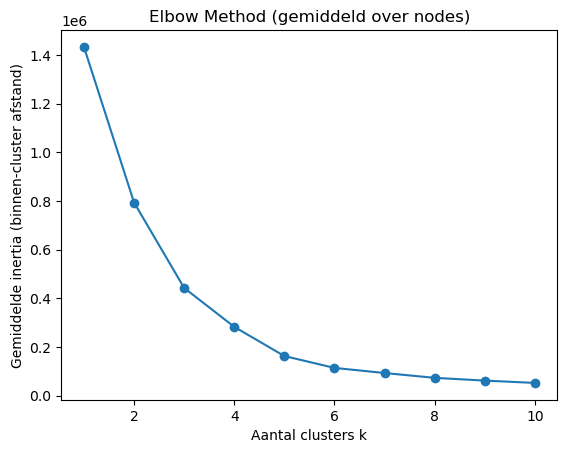

In [80]:
# Calculating amoutn of clusters
k_range = range(1, 11)
all_inertia = {k: [] for k in k_range}

for node in tsne_results:
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(tsne_results[node])
        all_inertia[k].append(kmeans.inertia_)

avg_inertia = [np.mean(all_inertia[k]) for k in k_range]

plt.plot(k_range, avg_inertia, marker='o')
plt.xlabel('Aantal clusters k')
plt.ylabel('Gemiddelde inertia (binnen-cluster afstand)')
plt.title('Elbow Method (gemiddeld over nodes)')
plt.show()

## Clusters


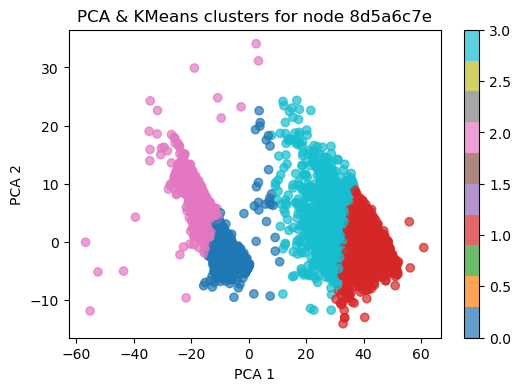

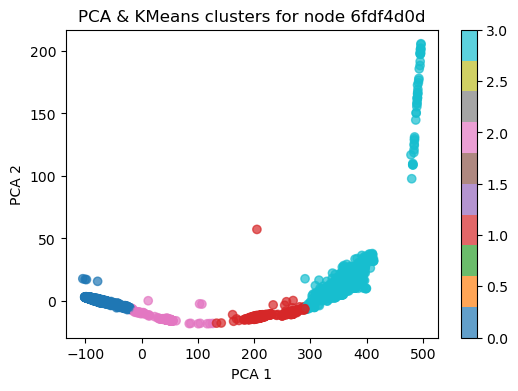

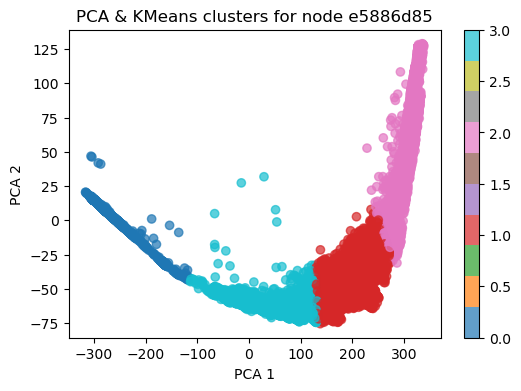

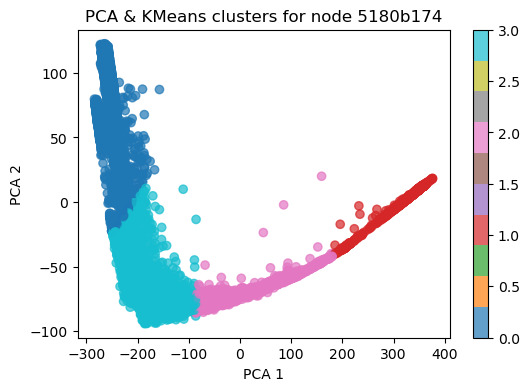

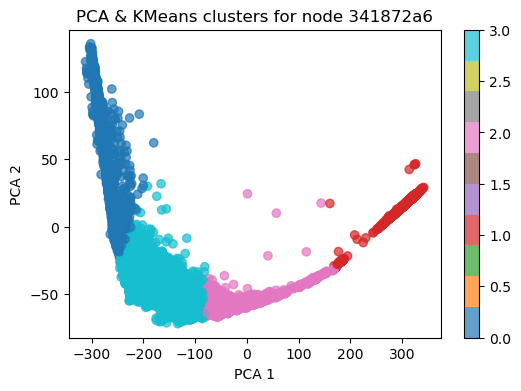

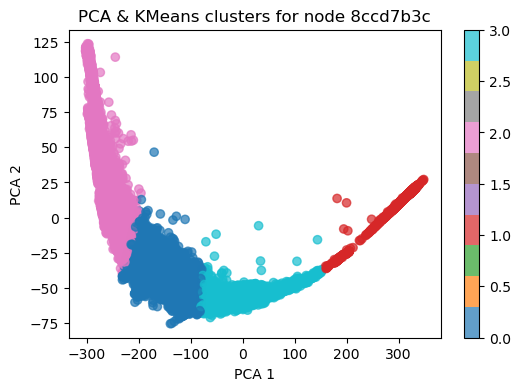

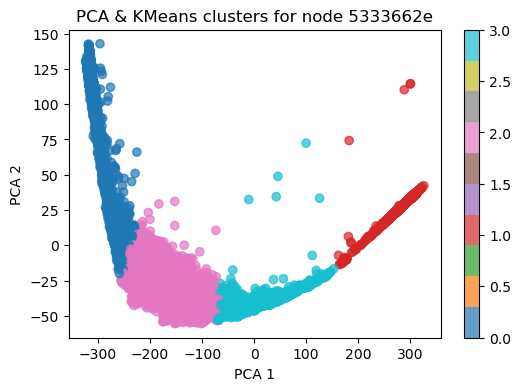

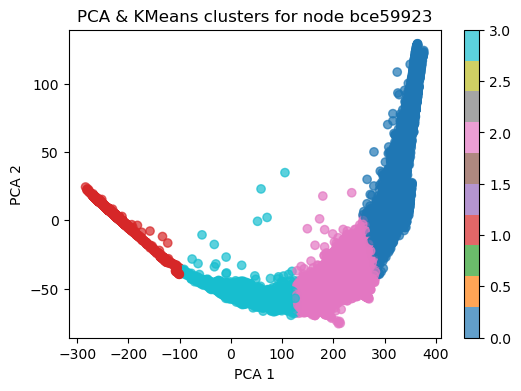

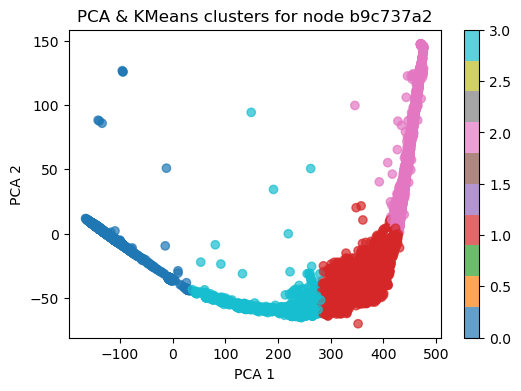

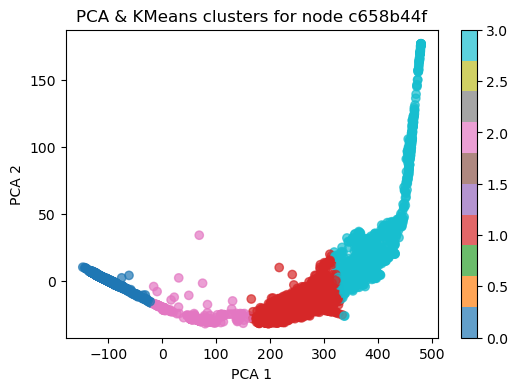

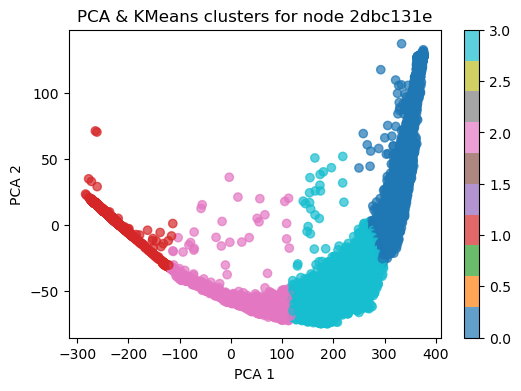

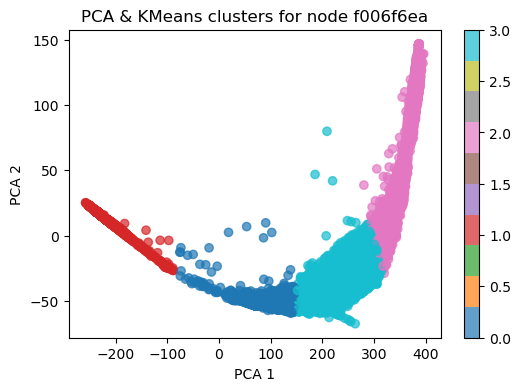

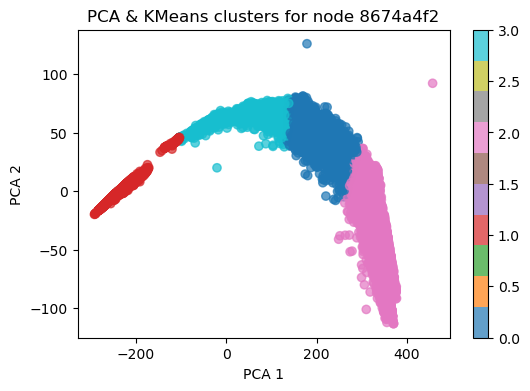

In [117]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pickle

results = {}
visualize = True
for node in df['node_name'].unique():
    subset = df[df['node_name'] == node].copy()
    features = subset[selected_features].fillna(0)

    kmeans = KMeans(n_clusters=4, random_state=42)
    subset['cluster'] = kmeans.fit_predict(features)

    results[node] = subset

    # Alleen visualiseren als nodig
    if visualize:
        pca = PCA(n_components=2)
        pca_result = pca.fit_transform(features)
        
        plt.figure(figsize=(6, 4))
        plt.scatter(pca_result[:, 0], pca_result[:, 1], c=subset['cluster'], cmap='tab10', alpha=0.7)
        plt.title(f'PCA & KMeans clusters for node {node}')
        plt.xlabel('PCA 1')
        plt.ylabel('PCA 2')
        plt.colorbar()
        plt.show()

# Pas hier opslaan!
with open('cluster_results.pkl', 'wb') as f:
    pickle.dump(results, f)


In [121]:
features = df[selected_features].fillna(0)
kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(features)
cluster_counts = df.groupby(['node_name', 'cluster']).size().unstack(fill_value=0)
cluster_counts

cluster       0      1      2      3
node_name                           
2dbc131e   6664  16706   3761   7801
341872a6   7020  12085   5858   9987
5180b174   7994  12955    905  13134
5333662e   7601   9416  10499   5954
6fdf4d0d   1304  14297   3209     45
8674a4f2   6780  17010   1884   9243
8ccd7b3c   7657  12066   4234  10347
8d5a6c7e      0  22230      0      0
b9c737a2   3753  18631    791   2385
bce59923   6188  16930   3545   7936
c658b44f   2332  12931   2415    270
e5886d85   7373  15069   2247   9688
f006f6ea   5249  16854   7249   5588

In [122]:
features_of_interest = [
    'cpu_usage_percent',
    'scaphandre_power_total_watts',
    'ipmi_system_power_watts',
    'rapl_power_total_watts',
    'scaphandre_power_total_watts'

]

clusters = sorted(df['cluster'].unique())

for cluster in clusters:
    print(f"\n=== Cluster {cluster} ===")
    
    cluster_data = df[df['cluster'] == cluster]
    
    for feature in features_of_interest:
        if feature in cluster_data.columns:
            min_val = cluster_data[feature].min()
            max_val = cluster_data[feature].max()
            mean_val = cluster_data[feature].mean()
            
            print(f"{feature}: min={min_val:.2f}, max={max_val:.2f}, mean={mean_val:.2f}")


=== Cluster 0 ===
cpu_usage_percent: min=12.60, max=68.26, mean=32.75
scaphandre_power_total_watts: min=181.12, max=333.03, mean=280.40
ipmi_system_power_watts: min=245.00, max=580.00, mean=328.78
rapl_power_total_watts: min=181.88, max=332.88, mean=280.41
scaphandre_power_total_watts: min=181.12, max=333.03, mean=280.40

=== Cluster 1 ===
cpu_usage_percent: min=0.06, max=25.37, mean=0.39
scaphandre_power_total_watts: min=32.64, max=155.98, mean=52.79
ipmi_system_power_watts: min=51.67, max=165.00, mean=81.92
rapl_power_total_watts: min=28.12, max=161.38, mean=52.79
scaphandre_power_total_watts: min=32.64, max=155.98, mean=52.79

=== Cluster 2 ===
cpu_usage_percent: min=1.35, max=50.31, mean=13.15
scaphandre_power_total_watts: min=115.55, max=264.44, mean=197.84
ipmi_system_power_watts: min=136.67, max=296.67, mean=237.16
rapl_power_total_watts: min=109.33, max=262.49, mean=197.83
scaphandre_power_total_watts: min=115.55, max=264.44, mean=197.84

=== Cluster 3 ===
cpu_usage_percent: m

In [124]:
# Plotting a timeline for each subset and node
df['timestamp'] = pd.to_datetime(df['timestamp'])
cmap = plt.get_cmap('tab10')
norm = plt.Normalize(vmin=0, vmax=df['cluster'].max())
print(machine_type)
for node, node_data in df.groupby('node_name'):
    node_data = node_data.sort_values('timestamp')
    unique_clusters = sorted(node_data['cluster'].dropna().unique())

    plt.figure(figsize=(12, 3))
    plt.scatter(
        node_data['timestamp'],
        node_data['cluster'],
        c=node_data['cluster'],
        cmap=cmap,
        norm=norm,
        marker='|',
        s=100
    )

    plt.title(f'Cluster-timeline for {node}')
    plt.xlabel('Time')
    plt.ylabel('Cluster')
    plt.yticks(unique_clusters)
    plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d\n%H:%M'))
    plt.xticks(rotation=45)

    legend_handles = [
        mpatches.Patch(color=cmap(norm(cluster)), label=f'Cluster {cluster}')
        for cluster in unique_clusters
    ]
    plt.legend(handles=legend_handles, title='Clusters', bbox_to_anchor=(1.01, 1), loc='upper left')

    plt.tight_layout()
    plt.savefig(f"combined/Timeline/{machine_type}/Timeline_clusters__{node}.png")
    plt.close()


df_subset = df[['node_name', 'timestamp', 'cluster']].copy()

# Sorteer op tijd (optioneel, maar handig)
df_subset = df_subset.sort_values(['node_name', 'timestamp'])

# Sla op als CSV
df_subset.to_csv(f"combined/Timeline/{machine_type}/Timeline_clusters__{machine_type}.", index=False)

b8994569


## Virtual machines

In [84]:
vms = set(df['vm_id'].unique())
vcpus_vms = df_vms[df_vms["vm_id"].astype(str).isin(vms)]


node_to_vms = df.groupby('node_name')['vm_id'].unique().to_dict()
node_to_vms = {node: list(vms) for node, vms in node_to_vms.items()}

node_to_vms

{'3176c89e': [nan, '57549711', 'd0706814', '396b1530'],
 '4791e4fe': [nan, '5482e5e2'],
 '6ff55332': [nan, '39d6d5f5', '72ad98b4', 'ae34f2ed'],
 '7e99a5c6': [nan, 'b2f29695', '3a2a709e'],
 '7f384201': [nan, '1bd8b816', 'e068054a', '6e176596', '8083079d'],
 'a2ff297e': [nan, 'bc1a9d9d', '9585c773', 'bf28c8c1', '9147bb6a'],
 'b022aa11': [nan, 'a1b13cf2'],
 'c2736b43': [nan, '3f1153d5', '6ece5dcb']}

## Results

In [103]:

agg_df_power = df.groupby(['node_name', 'cluster'])['ipmi_system_power_watts'].agg(
    mean_power='mean',
    sum_power='sum',
    count_power='size'
).reset_index()

agg_df_rapl = df.groupby(['node_name', 'cluster'])[
 'rapl_power_total_watts'].agg(
    mean_rapl='mean',
    sum_rapl='sum',
    count_rapl='size'
).reset_index()

agg_df_scaphandre = df.groupby(['node_name', 'cluster'])[
 'scaphandre_power_total_watts'].agg(
    mean_scaphandre='mean',
    sum_scaphandre='sum',
    count_scaphandre='size'
).reset_index()
    


agg_df_cpu = df.groupby(['node_name', 'cluster'])['cpu_usage_percent'].agg(
    mean_cpu='mean',
    sum_cpu='sum',
    count_cpu='size'
).reset_index()



# Merging

agg_dfs = [agg_df_power, agg_df_rapl, agg_df_scaphandre, agg_df_cpu]
agg_merged = reduce(lambda left, right: pd.merge(left, right, on=['node_name', 'cluster'], how='outer'), agg_dfs)


agg_merged.to_csv(f"combined/Statistics/Statistics_{machine_type}.csv", index=False)

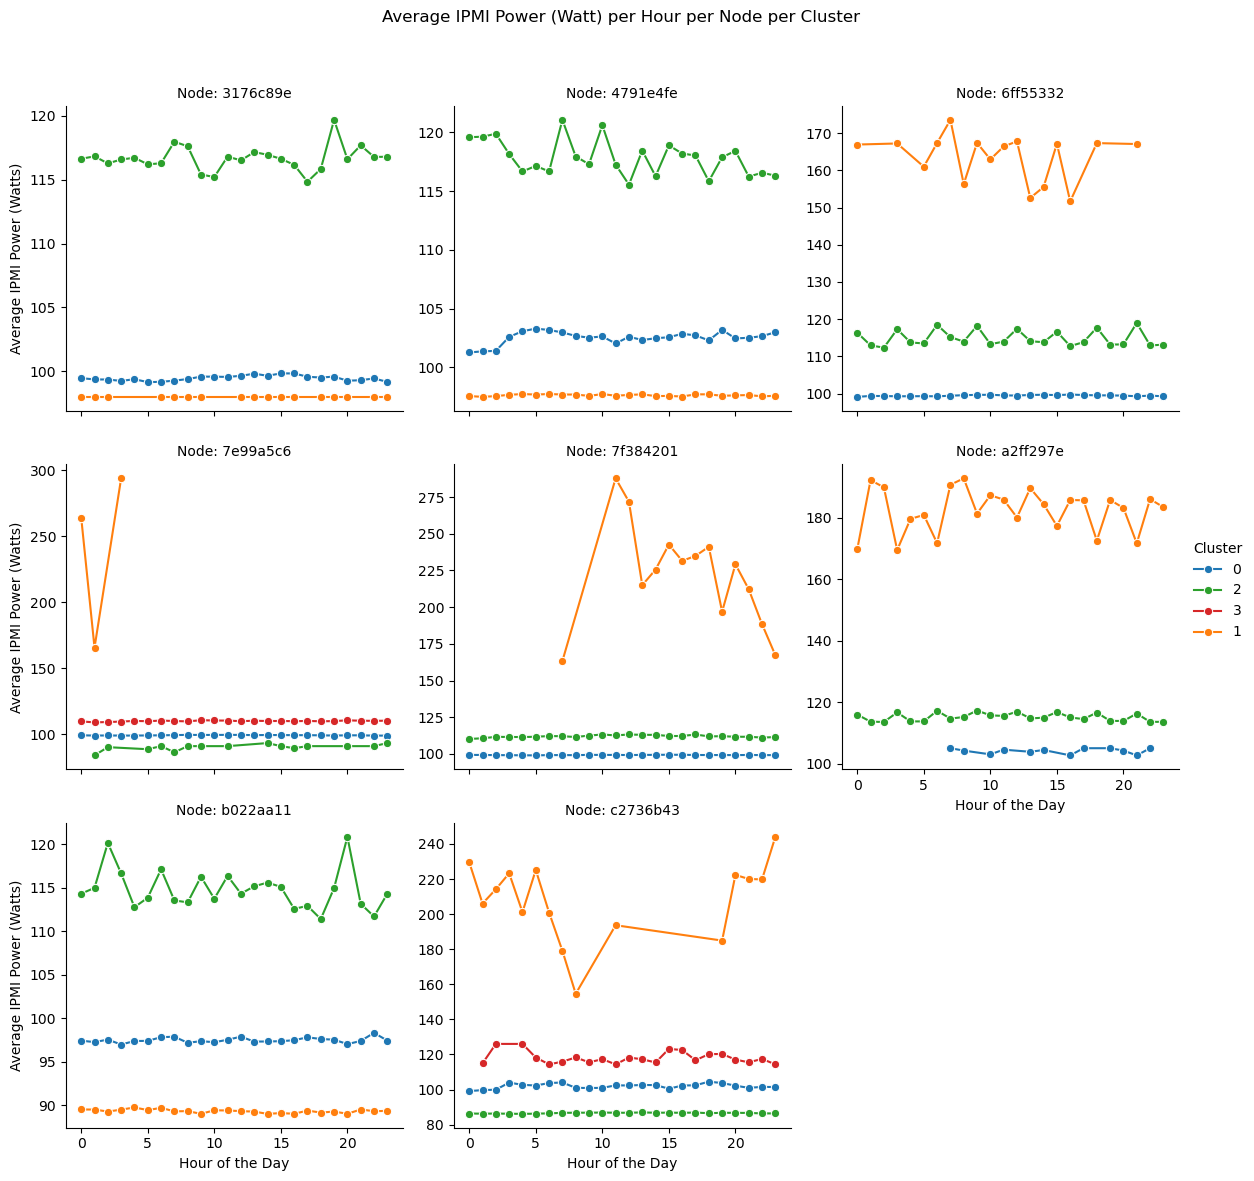

In [105]:
hourly_df = df.groupby(['node_name','cluster','hour'])['ipmi_system_power_watts'].mean().reset_index()

g = sns.FacetGrid(hourly_df, col="node_name", col_wrap=3, height=4, sharey=False)
g.map_dataframe(sns.lineplot, x='hour', y='ipmi_system_power_watts', hue='cluster', marker='o', palette='tab10')

g.set_titles(col_template="Node: {col_name}")
g.set_axis_labels('Hour of the Day', 'Average IPMI Power (Watts)')
g.add_legend(title="Cluster")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Average IPMI Power (Watt) per Hour per Node per Cluster')
plt.show()


hourly_df.to_csv(f"combined/cpu_energy/{machine_type}/energy_{node}.csv", index=False)

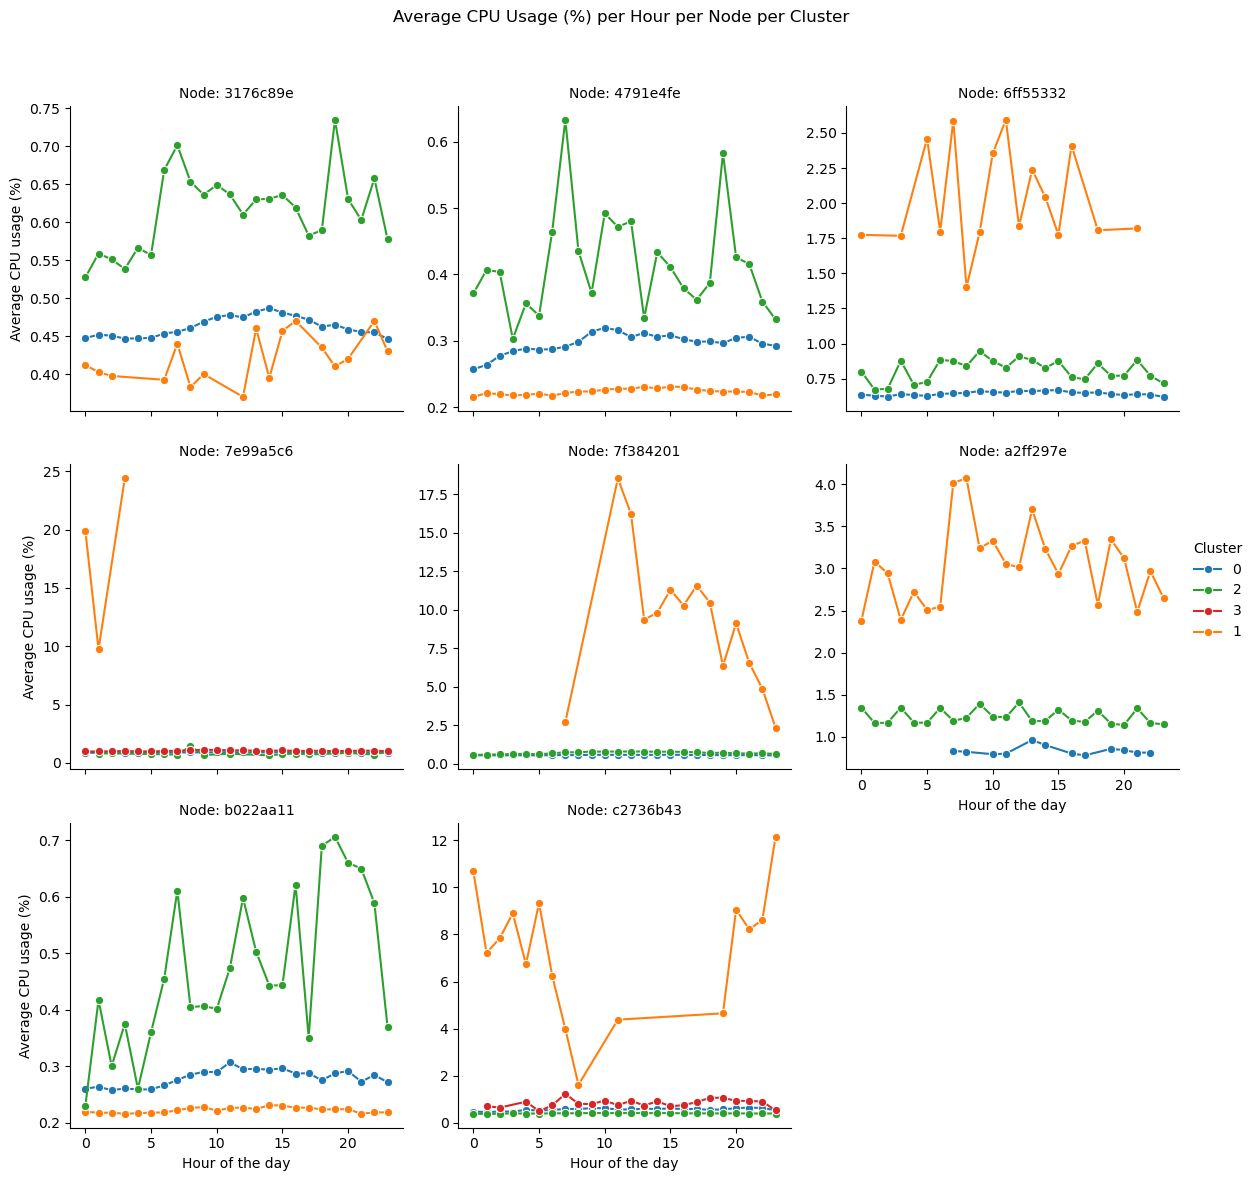

In [106]:
hourly_df_cpu = df.groupby(['node_name','cluster','hour'])['cpu_usage_percent'].mean().reset_index()

g = sns.FacetGrid(hourly_df_cpu, col="node_name", col_wrap=3, height=4, sharey=False)
g.map_dataframe(sns.lineplot, x='hour', y='cpu_usage_percent', hue='cluster', marker='o', palette='tab10')

g.set_titles(col_template="Node: {col_name}")
g.set_axis_labels('Hour of the day', 'Average CPU usage (%)')
g.add_legend(title="Cluster")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Average CPU Usage (%) per Hour per Node per Cluster")
plt.show()


hourly_df_cpu.to_csv(f"combined/cpu_energy/{machine_type}/cpu_{node}.csv", index=False)